# Імпорт бібліотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans
import time
import psutil
import os
from typing import List, Tuple, Dict
import pandas as pd
from matplotlib.patches import Ellipse
import warnings

### Налаштування бібліотек

In [2]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### Кастомні методи

In [3]:
from forel import forel
from k_means import k_means
from mean_shift import mean_shift

# Фукнції генерації кластерів

In [4]:

def plot_clusters(X: np.ndarray, y: np.ndarray, title: str = "Clusters", ax=None):
    """Функція для візуалізації кластерів."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()


In [5]:

def generate_circular_clusters(n_samples=300, n_centers=2, cluster_std=1.0, random_state=1729):
    """Генерація кругових кластерів"""
    np.random.seed(random_state)
    X, y = make_blobs(n_samples=n_samples, centers=n_centers, 
                      cluster_std=cluster_std, random_state=random_state)
    return X, y


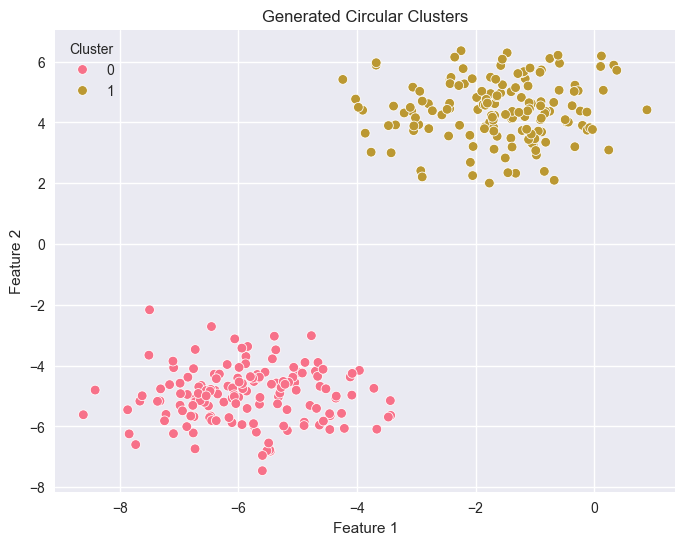

In [6]:
test_x, test_y = generate_circular_clusters()
plot_clusters(test_x, test_y, title="Generated Circular Clusters")

In [7]:

def generate_elliptical_clusters(n_samples=300, n_clusters=4, random_state=1729):
    """Генерація еліптичних кластерів"""
    np.random.seed(random_state)
    data = []
    labels = []
    
    for i in range(n_clusters):
        # Параметри еліпса
        center_x = np.random.uniform(-10, 10)
        center_y = np.random.uniform(-10, 10)
        a = np.random.uniform(2, 4)  # півосі
        b = np.random.uniform(1, 2)
        angle = np.random.uniform(0, 2*np.pi)
        
        # Генерація точок в еліпсі
        n_points = n_samples // n_clusters
        theta = np.random.uniform(0, 2*np.pi, n_points)
        r = np.random.uniform(0, 1, n_points)
        
        x_ellipse = np.sqrt(r) * a * np.cos(theta)
        y_ellipse = np.sqrt(r) * b * np.sin(theta)
        
        # Поворот
        x_rot = x_ellipse * np.cos(angle) - y_ellipse * np.sin(angle) + center_x
        y_rot = x_ellipse * np.sin(angle) + y_ellipse * np.cos(angle) + center_y
        
        cluster_data = np.column_stack([x_rot, y_rot])
        data.extend(cluster_data)
        labels.extend([i] * n_points)
    
    return np.array(data), np.array(labels)


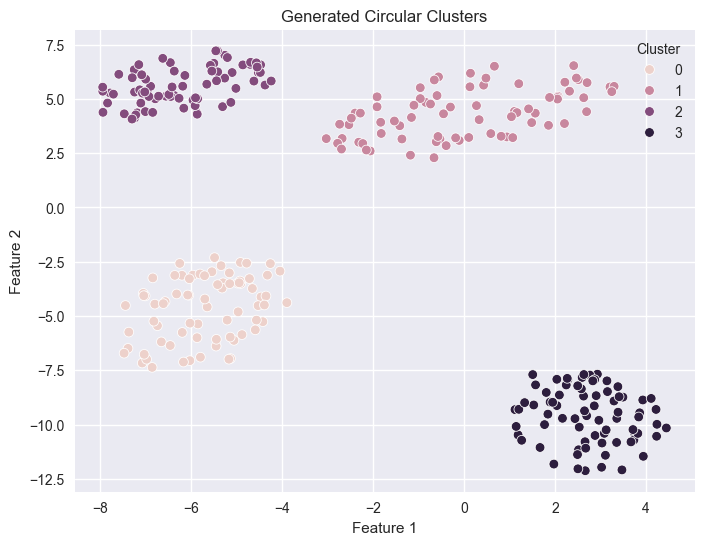

In [8]:
test_x, test_y = generate_elliptical_clusters()
plot_clusters(test_x, test_y, title="Generated Circular Clusters")

In [9]:

def generate_rectangular_clusters(n_samples=300, n_clusters=3, random_state=1729):
    """Генерація прямокутних кластерів"""
    np.random.seed(random_state)
    data = []
    labels = []
    
    for i in range(n_clusters):
        center_x = np.random.uniform(-10, 10)
        center_y = np.random.uniform(-10, 10)
        width = np.random.uniform(3, 6)
        height = np.random.uniform(2, 4)
        
        n_points = n_samples // n_clusters
        x = np.random.uniform(center_x - width/2, center_x + width/2, n_points)
        y = np.random.uniform(center_y - height/2, center_y + height/2, n_points)
        
        cluster_data = np.column_stack([x, y])
        data.extend(cluster_data)
        labels.extend([i] * n_points)
    
    return np.array(data), np.array(labels)



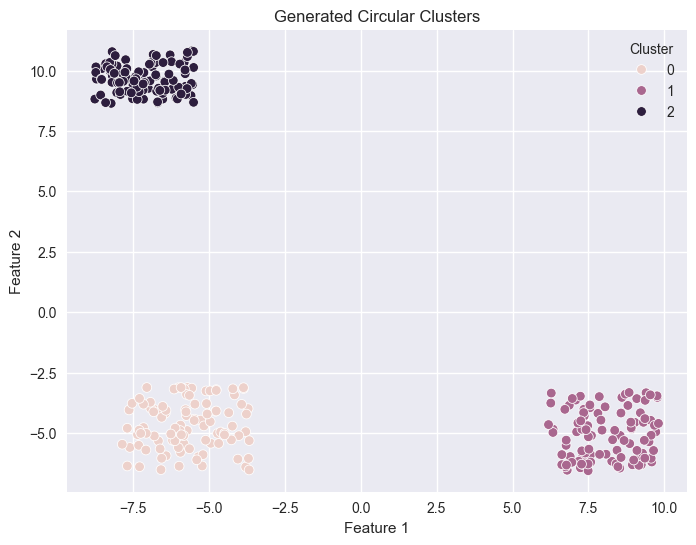

In [10]:
test_x, test_y = generate_rectangular_clusters()
plot_clusters(test_x, test_y, title="Generated Circular Clusters")

In [11]:

def generate_letter_shaped_clusters(n_samples=300, random_state=1729):
    """Генерація кластерів у формі літер"""
    np.random.seed(random_state)
    
    # Літера "C"
    theta = np.linspace(np.pi/4, 7*np.pi/4, n_samples//3)
    noise = np.random.normal(0, 0.2, n_samples//3)
    x_c = 5 * np.cos(theta) + noise + 0
    y_c = 5 * np.sin(theta) + noise + 0
    
    # Літера "L" 
    x_l1 = np.random.uniform(-8, -6, n_samples//6) + np.random.normal(0, 0.1, n_samples//6)
    y_l1 = np.random.uniform(-3, 3, n_samples//6) + np.random.normal(0, 0.1, n_samples//6)
    x_l2 = np.random.uniform(-8, -4, n_samples//6) + np.random.normal(0, 0.1, n_samples//6)
    y_l2 = np.random.uniform(-3, -2, n_samples//6) + np.random.normal(0, 0.1, n_samples//6)
    
    # Літера "T"
    x_t1 = np.random.uniform(4, 8, n_samples//6) + np.random.normal(0, 0.1, n_samples//6)
    y_t1 = np.random.uniform(2, 3, n_samples//6) + np.random.normal(0, 0.1, n_samples//6)
    x_t2 = np.random.uniform(5.5, 6.5, n_samples//6) + np.random.normal(0, 0.1, n_samples//6)
    y_t2 = np.random.uniform(-2, 3, n_samples//6) + np.random.normal(0, 0.1, n_samples//6)
    
    X = np.column_stack([
        np.concatenate([x_c, x_l1, x_l2, x_t1, x_t2]),
        np.concatenate([y_c, y_l1, y_l2, y_t1, y_t2])
    ])
    
    y = np.concatenate([
        np.zeros(n_samples//3),  # C
        np.ones(n_samples//3),   # L
        np.full(n_samples//3, 2) # T
    ])
    
    return X, y


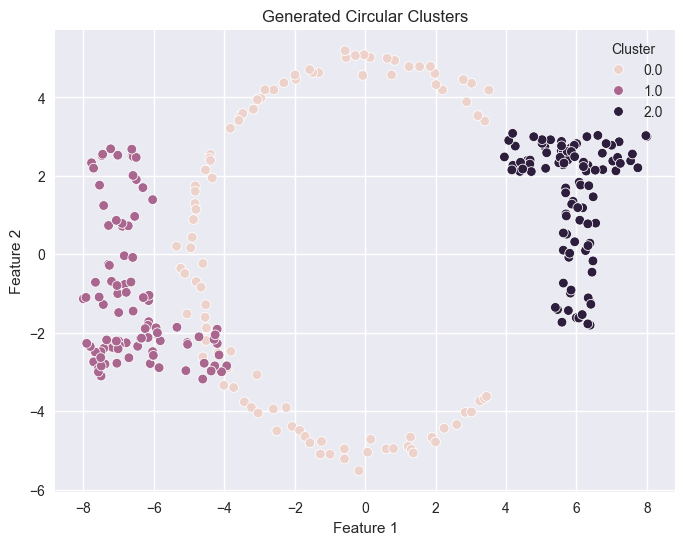

In [12]:
test_x, test_y = generate_letter_shaped_clusters()
plot_clusters(test_x, test_y, title="Generated Circular Clusters")

In [13]:

def generate_mixed_clusters(n_samples=400, random_state=1729):
    """Генерація змішаних типів кластерів"""
    np.random.seed(random_state)
    
    # Круговий кластер
    X1, _ = make_blobs(n_samples=n_samples//4, centers=1, center_box=(-5, -5), 
                       cluster_std=1.0, random_state=random_state)
    
    # Кільцевий кластер
    X2, _ = make_circles(n_samples=n_samples//4, noise=0.1, factor=0.3, random_state=random_state)
    X2 = X2 * 3 + np.array([5, 5])
    
    # Місяцеподібний кластер
    X3, _ = make_moons(n_samples=n_samples//4, noise=0.1, random_state=random_state)
    X3 = X3  + np.array([-5, 5])
    
    # Еліптичний кластер
    theta = np.linspace(0, 2*np.pi, n_samples//4)
    noise = np.random.normal(0, 0.2, n_samples//4)
    x_ellipse = 2 * np.cos(theta) + noise + 5
    y_ellipse = 1 * np.sin(theta) + noise - 5
    X4 = np.column_stack([x_ellipse, y_ellipse])
    
    X = np.vstack([X1, X2, X3, X4])
    y = np.concatenate([np.zeros(n_samples//4), np.ones(n_samples//4), 
                       np.full(n_samples//4, 2), np.full(n_samples//4, 3)])
    
    return X, y


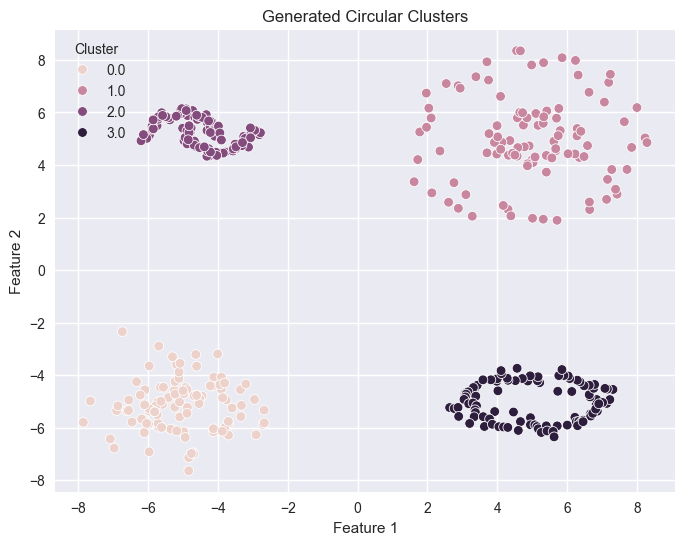

In [14]:
test_x, test_y = generate_mixed_clusters()
plot_clusters(test_x, test_y, title="Generated Circular Clusters")

## Основна функція візуалізації

In [15]:

def plot_clustering_results(X, labels_true, labels_pred, algorithm_name, dataset_name, 
                          centers=None, save_path=None):
    """Візуалізація результатів кластеризації"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Оригінальні кластери
    scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=labels_true, cmap='viridis', alpha=0.7)
    axes[0].set_title(f'Справжні кластери\n{dataset_name}', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('X1')
    axes[0].set_ylabel('X2')
    axes[0].grid(True, alpha=0.3)
    
    # Результати кластеризації
    scatter2 = axes[1].scatter(X[:, 0], X[:, 1], c=labels_pred, cmap='viridis', alpha=0.7)
    if centers is not None:
        axes[1].scatter(centers[:, 0], centers[:, 1], c='red', marker='x', 
                       s=200, linewidths=3, label='Центри')
        axes[1].legend()
    
    axes[1].set_title(f'Результат {algorithm_name}\n{dataset_name}', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('X1')
    axes[1].set_ylabel('X2')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"💾 Збережено: {save_path}")
    
    plt.show()


## Додаткова функція візуалізації (для аналізу)

In [16]:

def plot_stability_analysis(original_data, perturbed_data, original_labels, perturbed_labels, 
                          algorithm_name, dataset_name, delta, save_path=None):
    """Візуалізація аналізу стабільності"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Оригінальні результати
    scatter1 = axes[0].scatter(original_data[:, 0], original_data[:, 1], 
                              c=original_labels, cmap='viridis', alpha=0.7)
    axes[0].set_title(f'Оригінальні дані\n{algorithm_name} на {dataset_name}', 
                     fontsize=12, fontweight='bold')
    axes[0].set_xlabel('X1')
    axes[0].set_ylabel('X2')
    axes[0].grid(True, alpha=0.3)
    
    # Результати після збурення
    scatter2 = axes[1].scatter(perturbed_data[:, 0], perturbed_data[:, 1], 
                              c=perturbed_labels, cmap='viridis', alpha=0.7)
    axes[1].set_title(f'Після δ-збурення (δ={delta:.3f})\n{algorithm_name} на {dataset_name}', 
                     fontsize=12, fontweight='bold')
    axes[1].set_xlabel('X1')
    axes[1].set_ylabel('X2')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"💾 Збережено: {save_path}")
    
    plt.show()
    

## Технічні функції для аналізу (функції обгортки)

In [17]:

def measure_performance(algorithm_func, data, *args):
    """Вимірювання часу виконання та використання пам'яті"""
    process = psutil.Process(os.getpid())
    memory_before = process.memory_info().rss / 1024 / 1024  # MB
    
    start_time = time.time()
    result = algorithm_func(data, *args)
    end_time = time.time()
    
    memory_after = process.memory_info().rss / 1024 / 1024  # MB
    memory_used = memory_after - memory_before
    
    execution_time = end_time - start_time
    
    return result, execution_time, memory_used


In [18]:

def stability_test(algorithm_func, data, delta_values, *args):
    """Тест на стабільність алгоритму"""
    stability_results = []
    
    for delta in delta_values:
        # Створення збуреного набору даних
        perturbed_data = data.copy()
        random_idx = np.random.randint(0, len(data))
        perturbation = np.random.normal(0, delta, size=data.shape[1])
        perturbed_data[random_idx] += perturbation
        
        # Порівняння результатів
        original_labels = algorithm_func(data, *args)
        perturbed_labels = algorithm_func(perturbed_data, *args)
        
        if isinstance(original_labels, tuple):
            original_labels = original_labels[1]
        if isinstance(perturbed_labels, tuple):
            perturbed_labels = perturbed_labels[1]
        
        # Обчислення міри схожості
        if len(original_labels) == len(perturbed_labels):
            similarity = np.mean(original_labels == perturbed_labels)
        else:
            similarity = 0.0
        
        stability_results.append({
            'delta': delta,
            'similarity': similarity,
            'perturbed_data': perturbed_data,
            'original_labels': original_labels,
            'perturbed_labels': perturbed_labels
        })
    
    return stability_results


# Основний аналіз

In [19]:
datasets = {
        'Кругові кластери': generate_circular_clusters() ,
        'Еліптичні кластери': generate_elliptical_clusters(),
        'Прямокутні кластери': generate_rectangular_clusters(),
        'Літерні форми': generate_letter_shaped_clusters(),
        'Змішані типи': generate_mixed_clusters()
    }

algorithms = {
    'Forel': forel,
    'K-Means': k_means,
    'Mean Shift': mean_shift
}

algorithm_params = {
        'K-Means': [2, 4, 3, 3, 4],  # кількість кластерів
        'Mean Shift': [2.0, 3.0, 2.5, 4.0, 3.0],  # bandwidth
        'Forel': [2.0, 3.0, 2.5, 4.0, 3.0]  # bandwidth
    }

performance_results = []
stability_results = []


📊 Аналіз набору даних: Кругові кластери
----------------------------------------
  🔄 Тестування K-Means...
💾 Збережено: clustering_visualizations/K-Means_Кругові_кластери_results.png


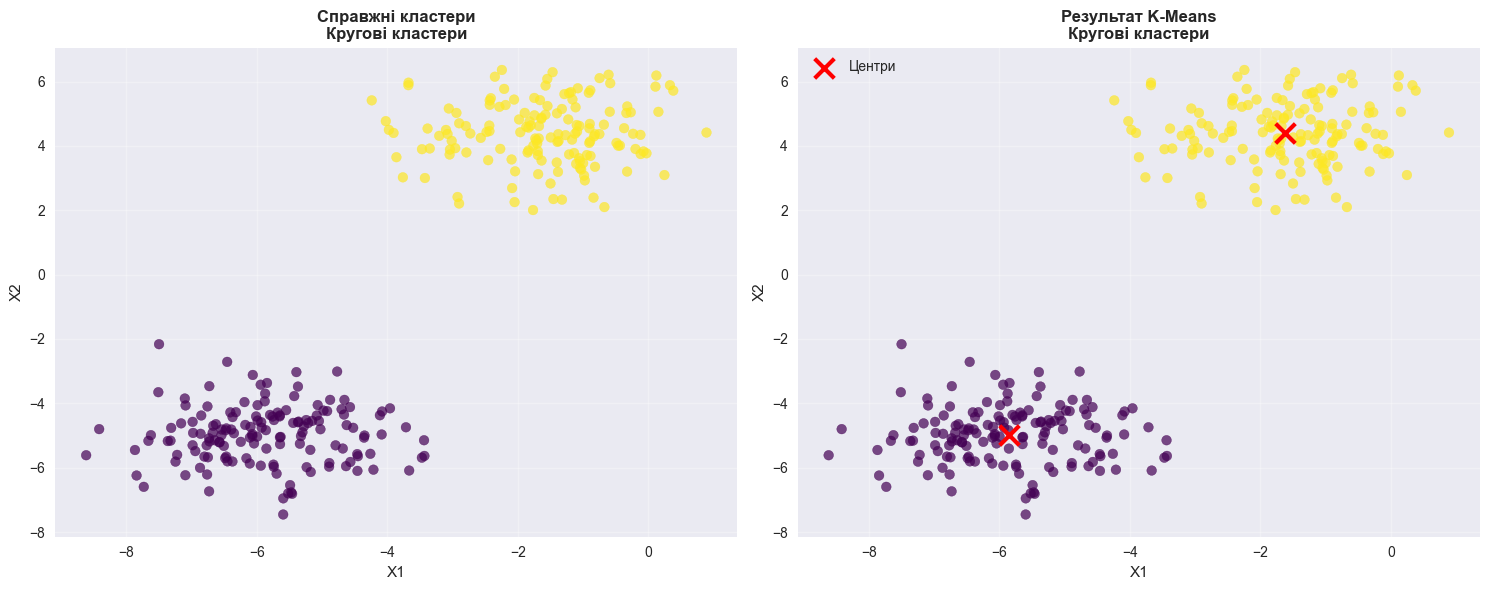

    🔍 Тест стабільності K-Means...
💾 Збережено: clustering_visualizations/K-Means_Кругові_кластери_stability.png


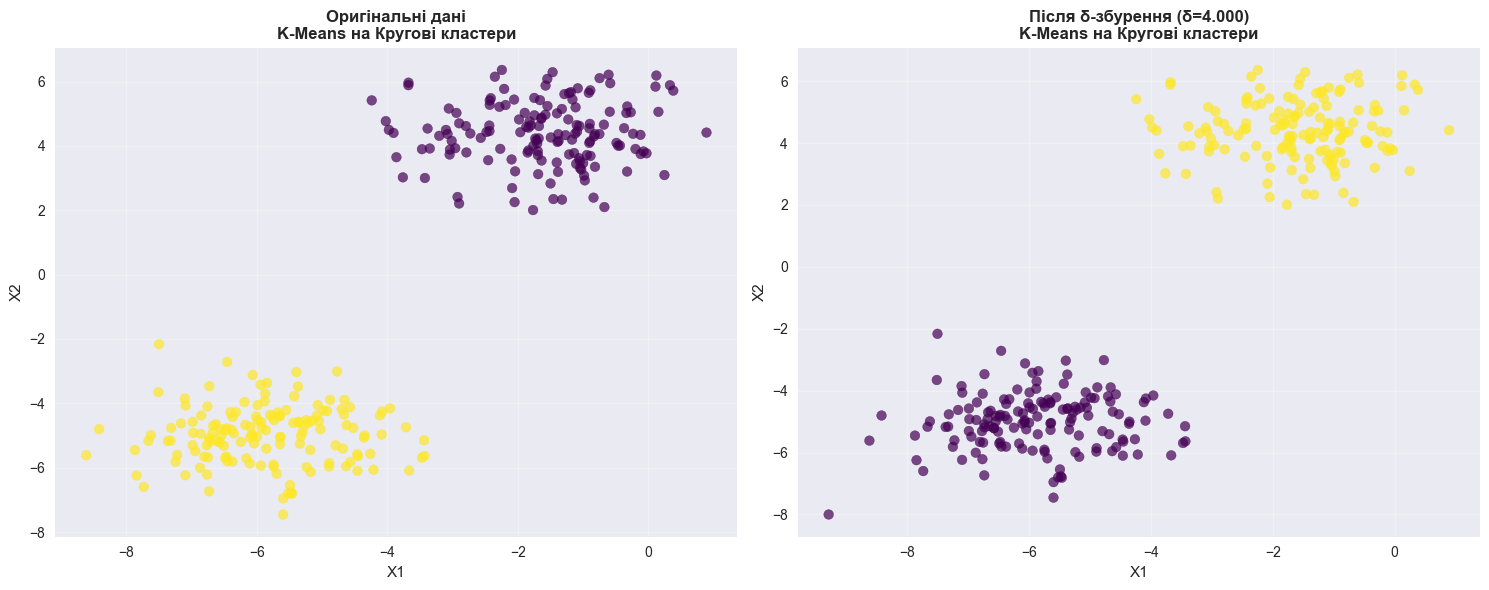


📊 Аналіз набору даних: Еліптичні кластери
----------------------------------------
  🔄 Тестування K-Means...
💾 Збережено: clustering_visualizations/K-Means_Еліптичні_кластери_results.png


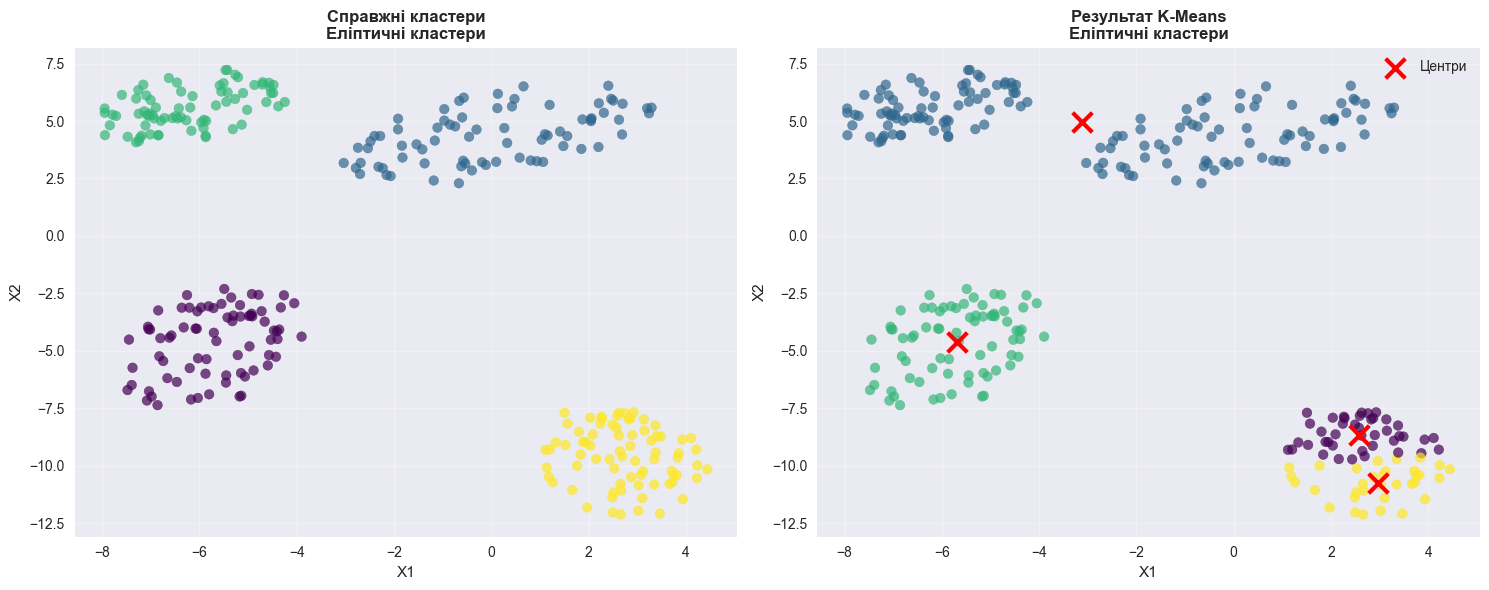

    🔍 Тест стабільності K-Means...
💾 Збережено: clustering_visualizations/K-Means_Еліптичні_кластери_stability.png


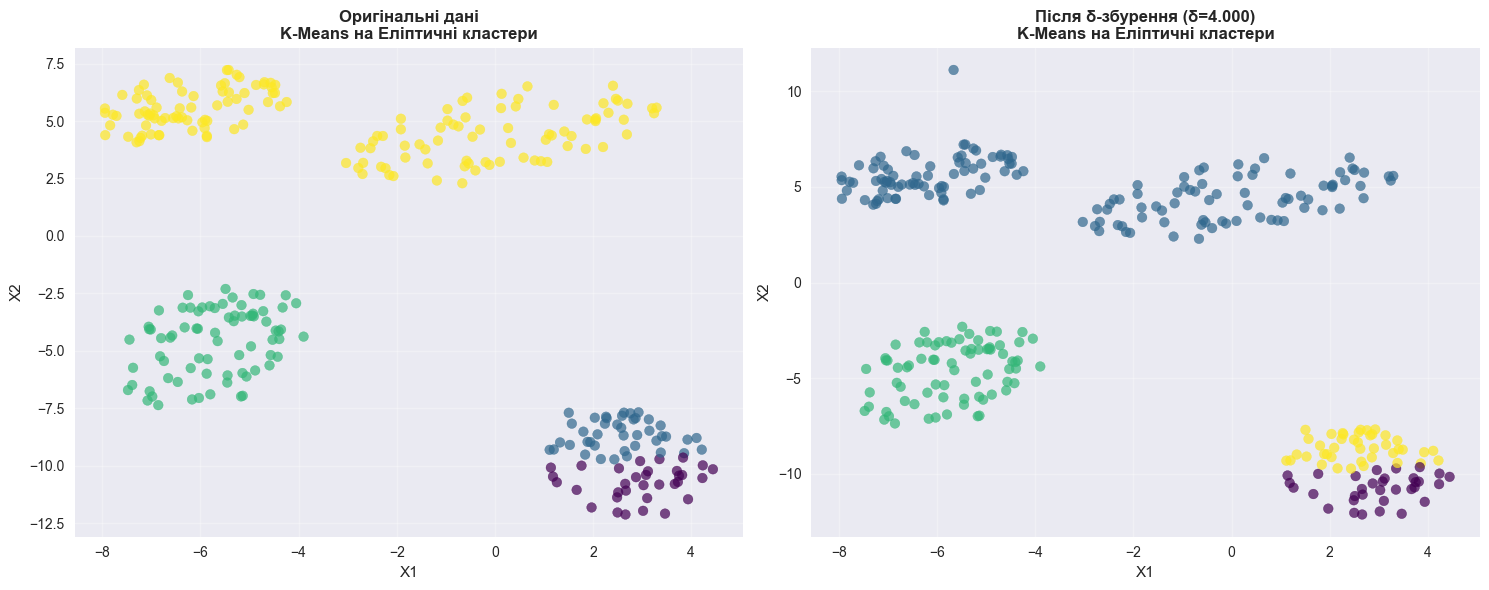


📊 Аналіз набору даних: Прямокутні кластери
----------------------------------------
  🔄 Тестування K-Means...
💾 Збережено: clustering_visualizations/K-Means_Прямокутні_кластери_results.png


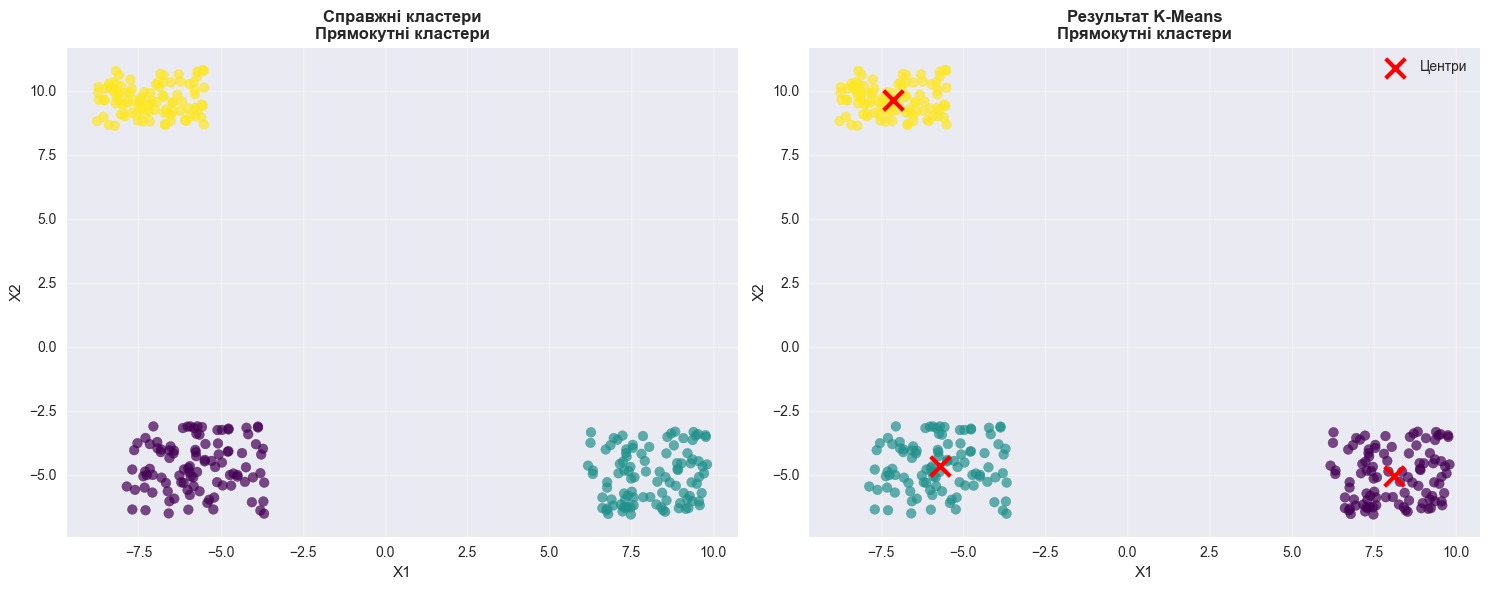

    🔍 Тест стабільності K-Means...
💾 Збережено: clustering_visualizations/K-Means_Прямокутні_кластери_stability.png


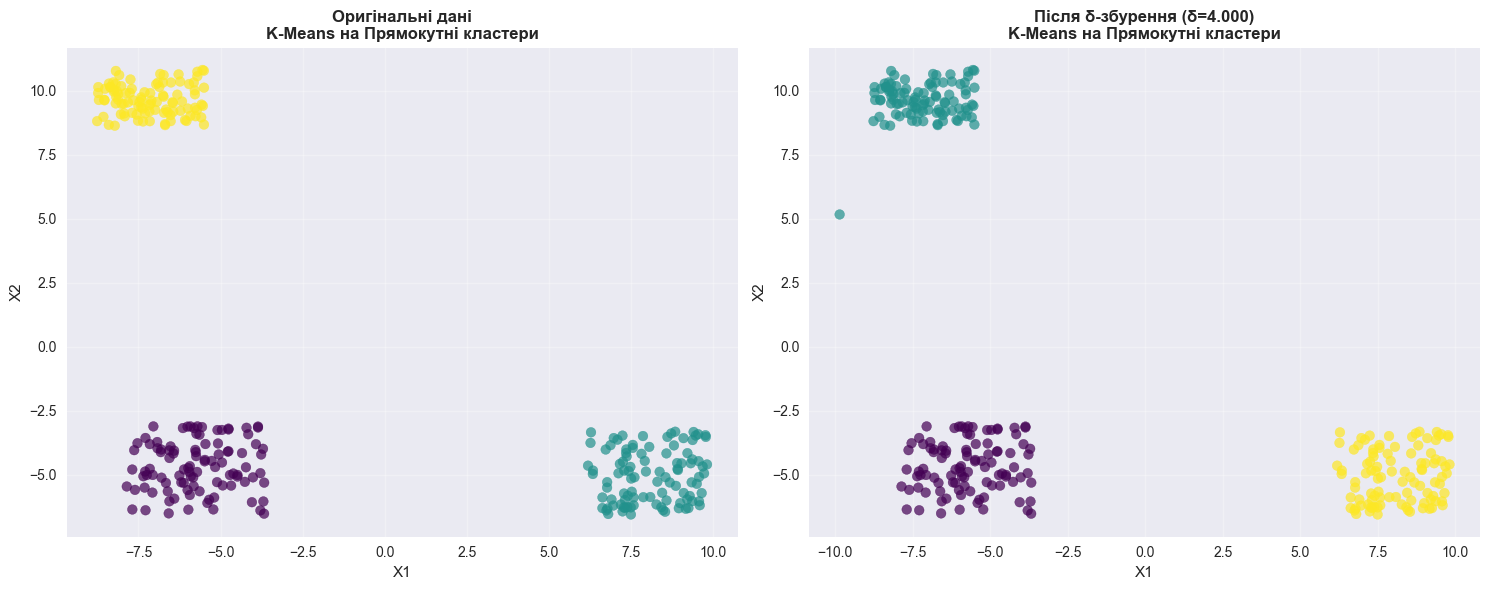


📊 Аналіз набору даних: Літерні форми
----------------------------------------
  🔄 Тестування K-Means...
💾 Збережено: clustering_visualizations/K-Means_Літерні_форми_results.png


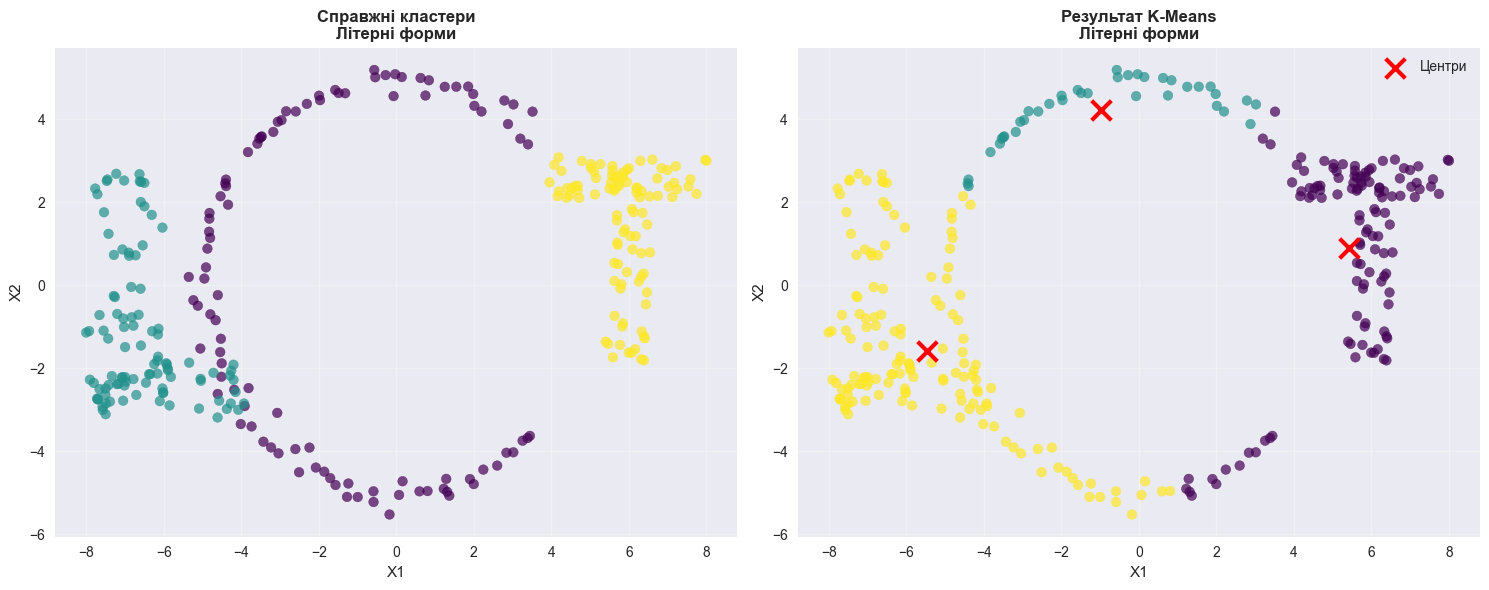

    🔍 Тест стабільності K-Means...
💾 Збережено: clustering_visualizations/K-Means_Літерні_форми_stability.png


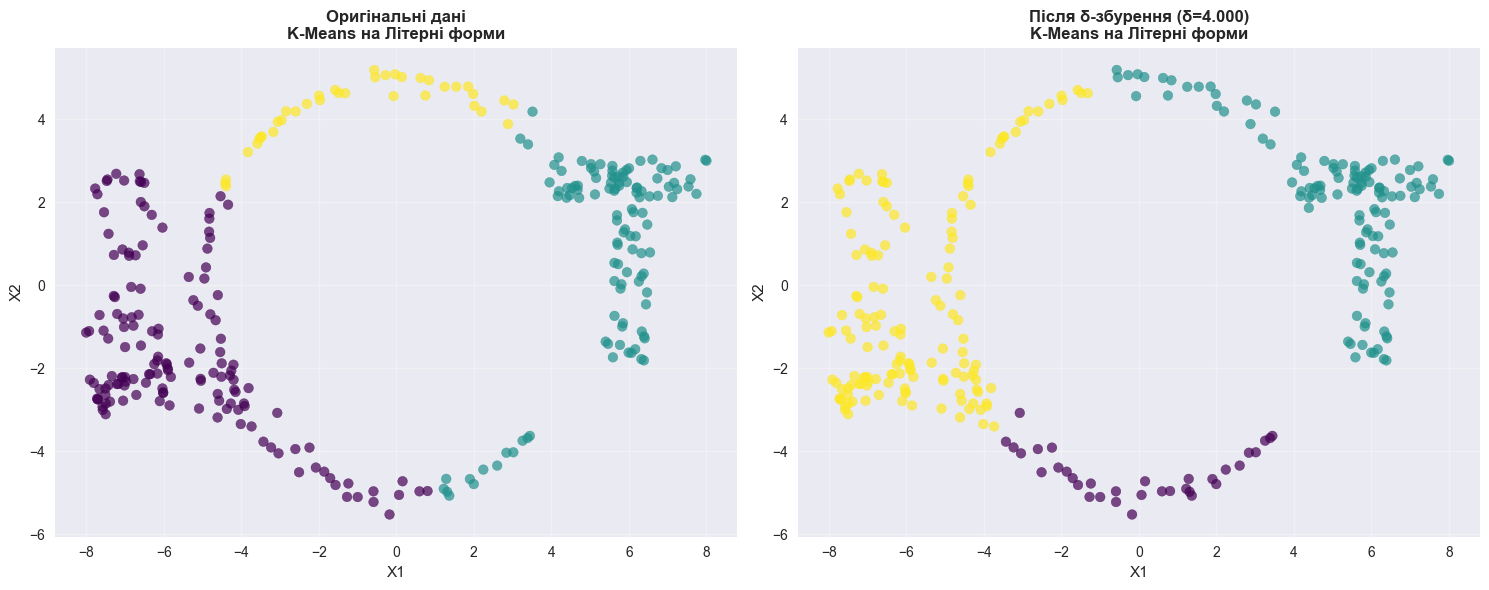


📊 Аналіз набору даних: Змішані типи
----------------------------------------
  🔄 Тестування K-Means...
💾 Збережено: clustering_visualizations/K-Means_Змішані_типи_results.png


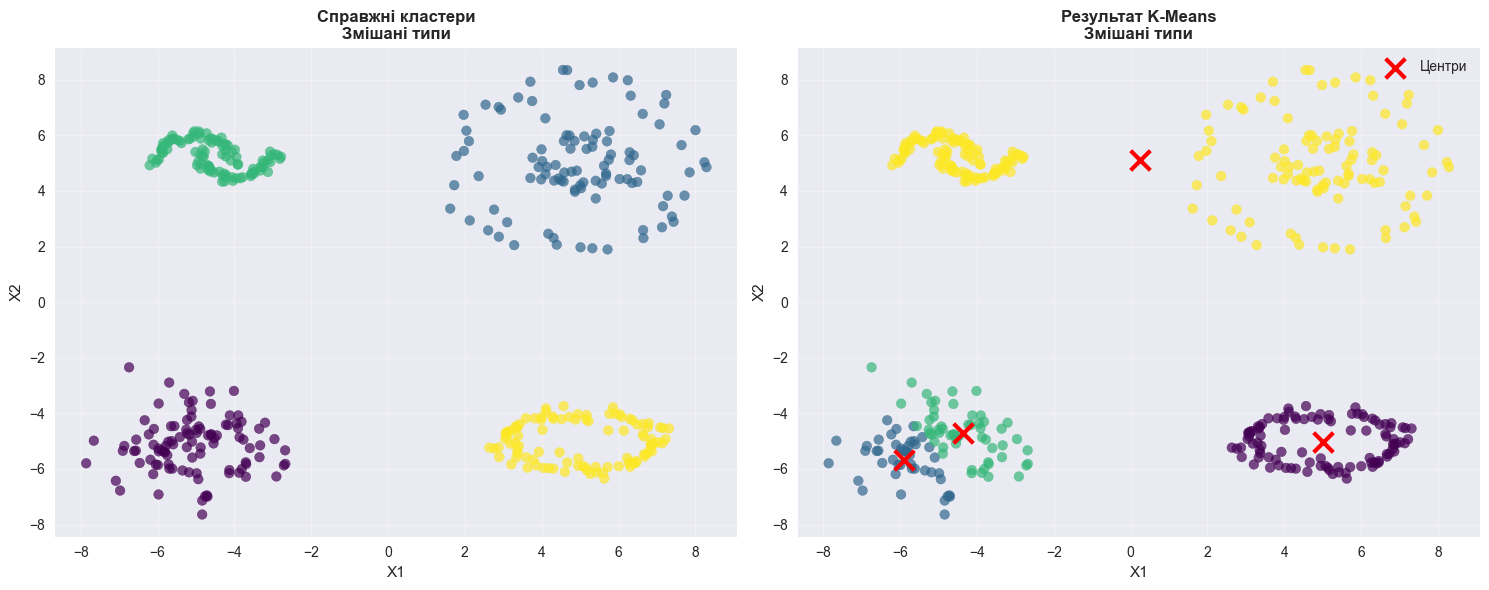

    🔍 Тест стабільності K-Means...
💾 Збережено: clustering_visualizations/K-Means_Змішані_типи_stability.png


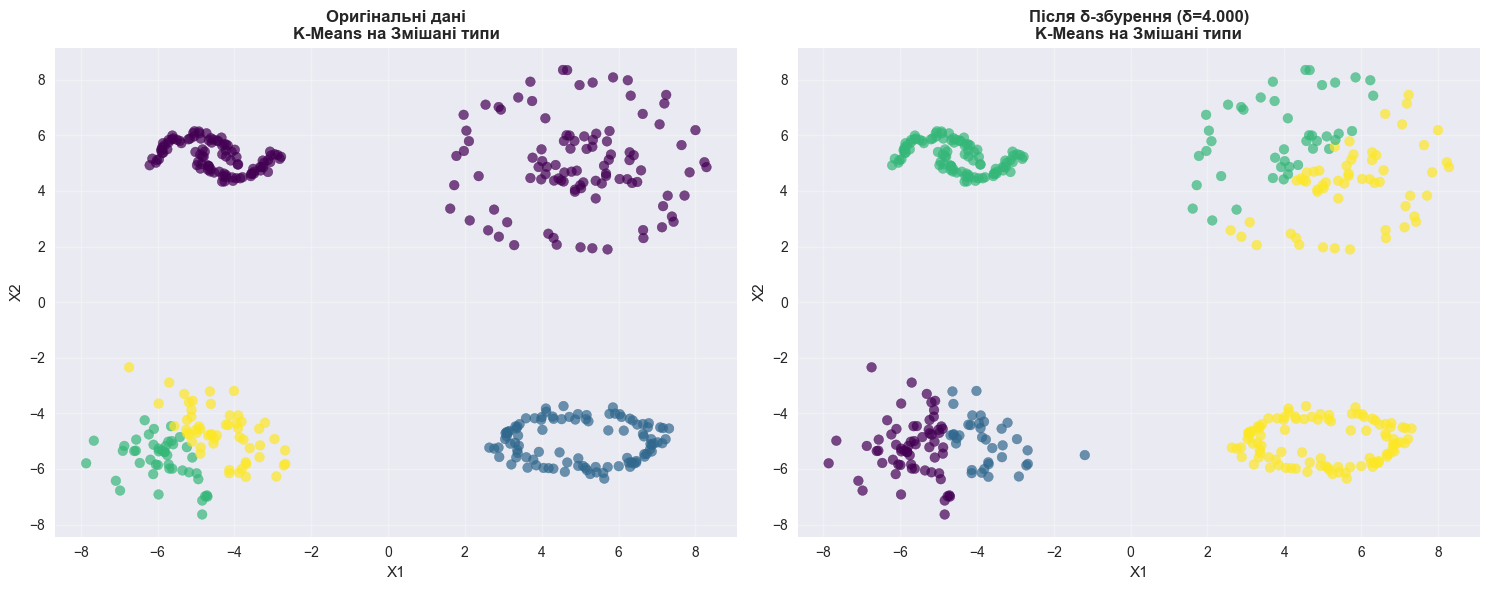

In [20]:
for dataset_name, (X, y_true) in datasets.items():
    print(f"\n📊 Аналіз набору даних: {dataset_name}")
    print("-" * 40)
    
    alg_name = "K-Means"
    alg_func = algorithms['K-Means']
    print(f"  🔄 Тестування {alg_name}...")
    
    
    param_idx = list(datasets.keys()).index(dataset_name)
    param = algorithm_params[alg_name][param_idx]
    
    
    result, exec_time, memory_used = measure_performance(alg_func, X, param)
    
    if isinstance(result, tuple):
        centers, labels_pred = result
    else:
        centers, labels_pred = None, result
        
    
    performance_results.append({
        'Алгоритм': alg_name,
        'Набір даних': dataset_name,
        'Час виконання (сек)': round(exec_time, 4),
        'Пам\'ять (МБ)': round(memory_used, 2),
        'Параметр': param
    })
        
    
    save_path = f'clustering_visualizations/{alg_name}_{dataset_name.replace(" ", "_")}_results.png'
    plot_clustering_results(X, y_true, labels_pred, alg_name, dataset_name, 
                              centers, save_path)
    
    
    print(f"    🔍 Тест стабільності {alg_name}...")
    delta_values = [0.2, 2, 4.0]
    stability_test_results = stability_test(alg_func, X, delta_values, param)
        
    for j, delta_result in enumerate(stability_test_results):
        stability_results.append({
            'Алгоритм': alg_name,
            'Набір даних': dataset_name,
            'δ': delta_result['delta'],
            'Схожість': round(delta_result['similarity'], 3)
        })
        

    if j == 2:
            save_path = f'clustering_visualizations/{alg_name}_{dataset_name.replace(" ", "_")}_stability.png'
            plot_stability_analysis(X, delta_result['perturbed_data'], 
                                    delta_result['original_labels'], 
                                    delta_result['perturbed_labels'],
                                    alg_name, dataset_name, delta_result['delta'], 
                                    save_path)


📊 Аналіз набору даних: Кругові кластери
----------------------------------------
  🔄 Тестування Forel...
💾 Збережено: clustering_visualizations/Forel_Кругові_кластери_results.png


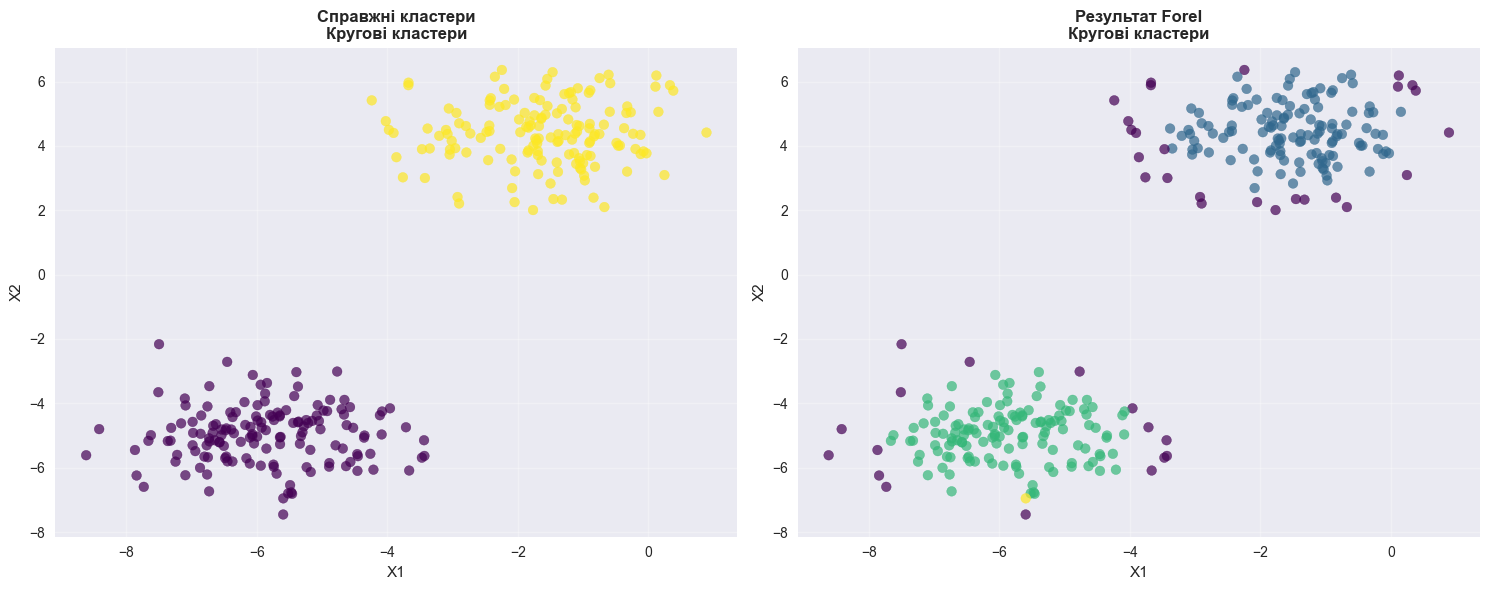

    🔍 Тест стабільності Forel...
💾 Збережено: clustering_visualizations/Forel_Кругові_кластери_stability.png


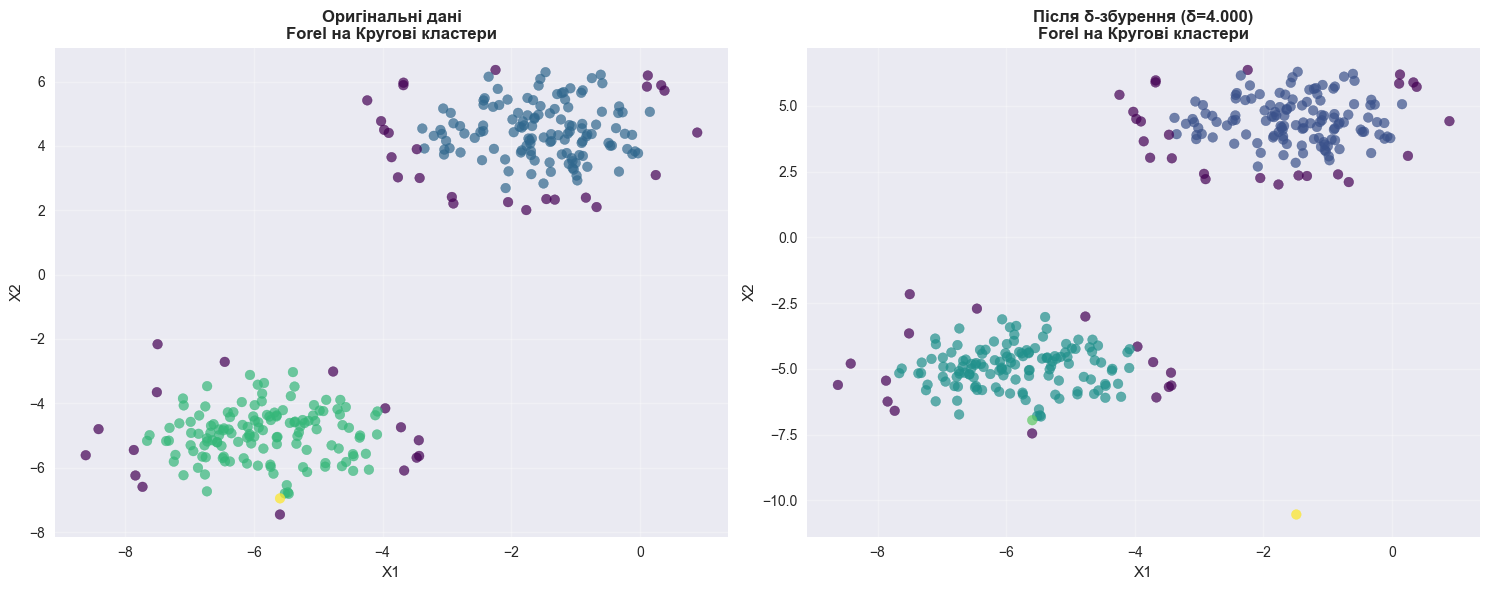


📊 Аналіз набору даних: Еліптичні кластери
----------------------------------------
  🔄 Тестування Forel...
💾 Збережено: clustering_visualizations/Forel_Еліптичні_кластери_results.png


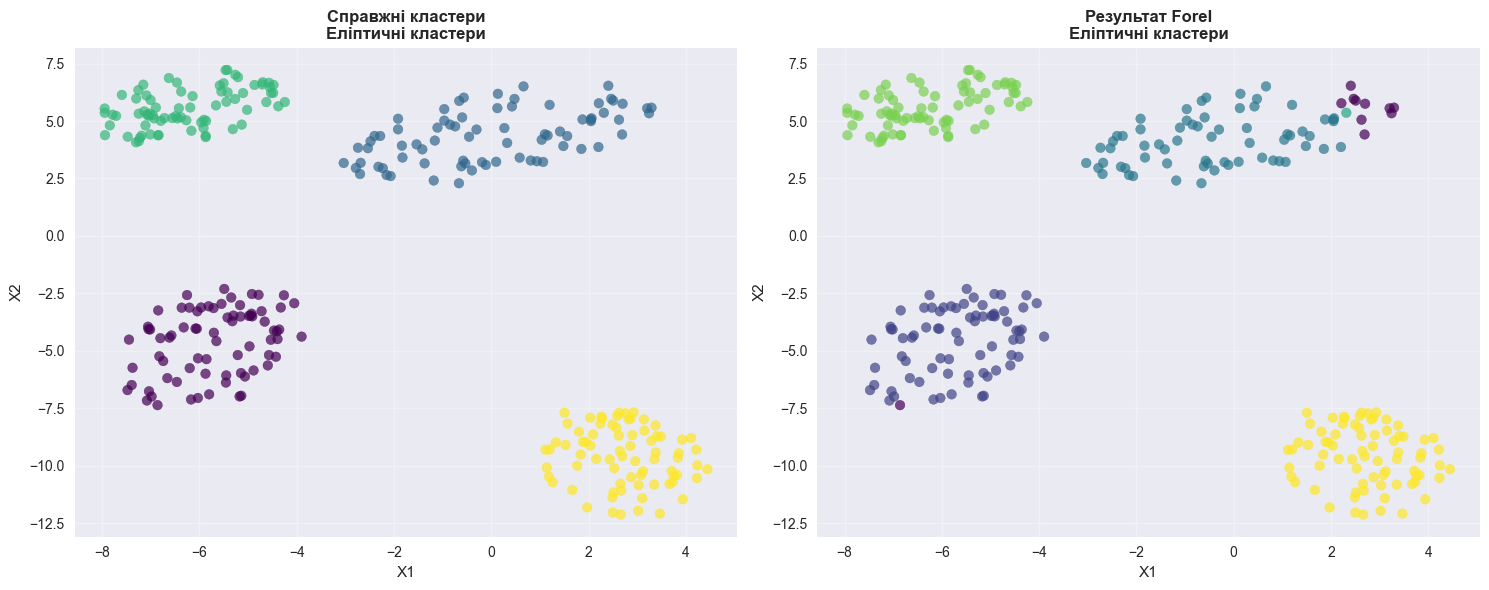

    🔍 Тест стабільності Forel...
💾 Збережено: clustering_visualizations/Forel_Еліптичні_кластери_stability.png


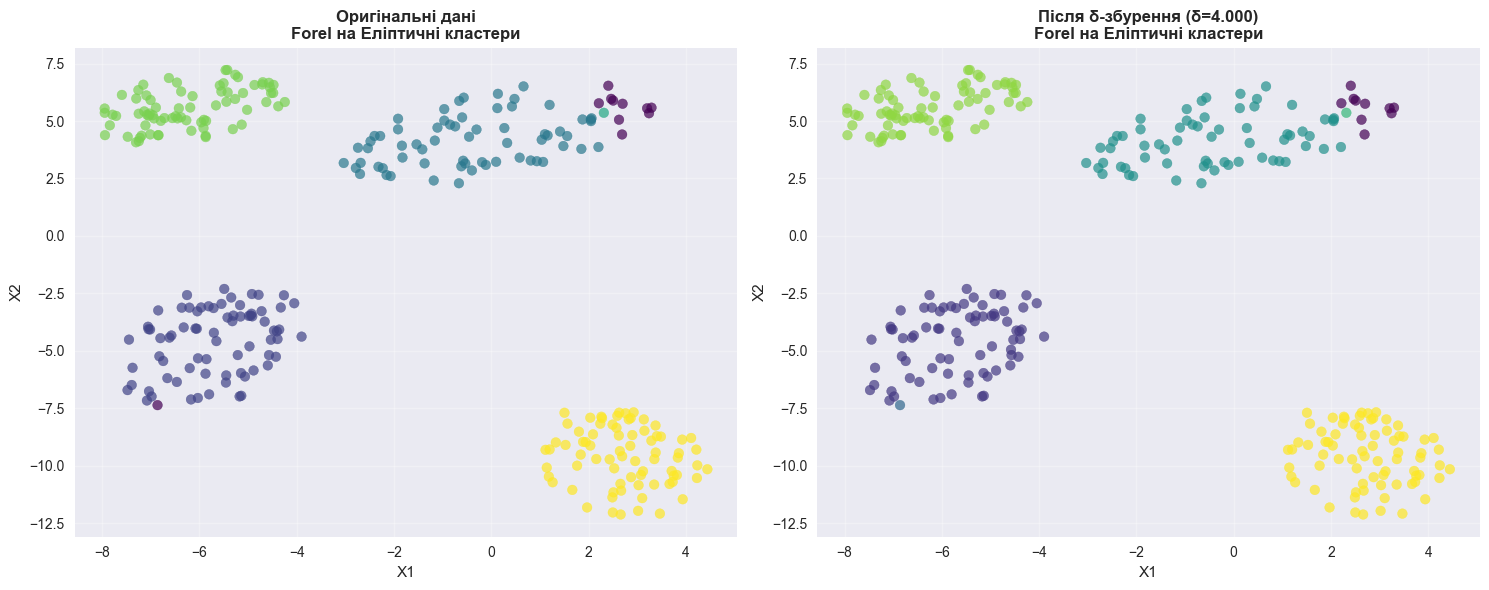


📊 Аналіз набору даних: Прямокутні кластери
----------------------------------------
  🔄 Тестування Forel...
💾 Збережено: clustering_visualizations/Forel_Прямокутні_кластери_results.png


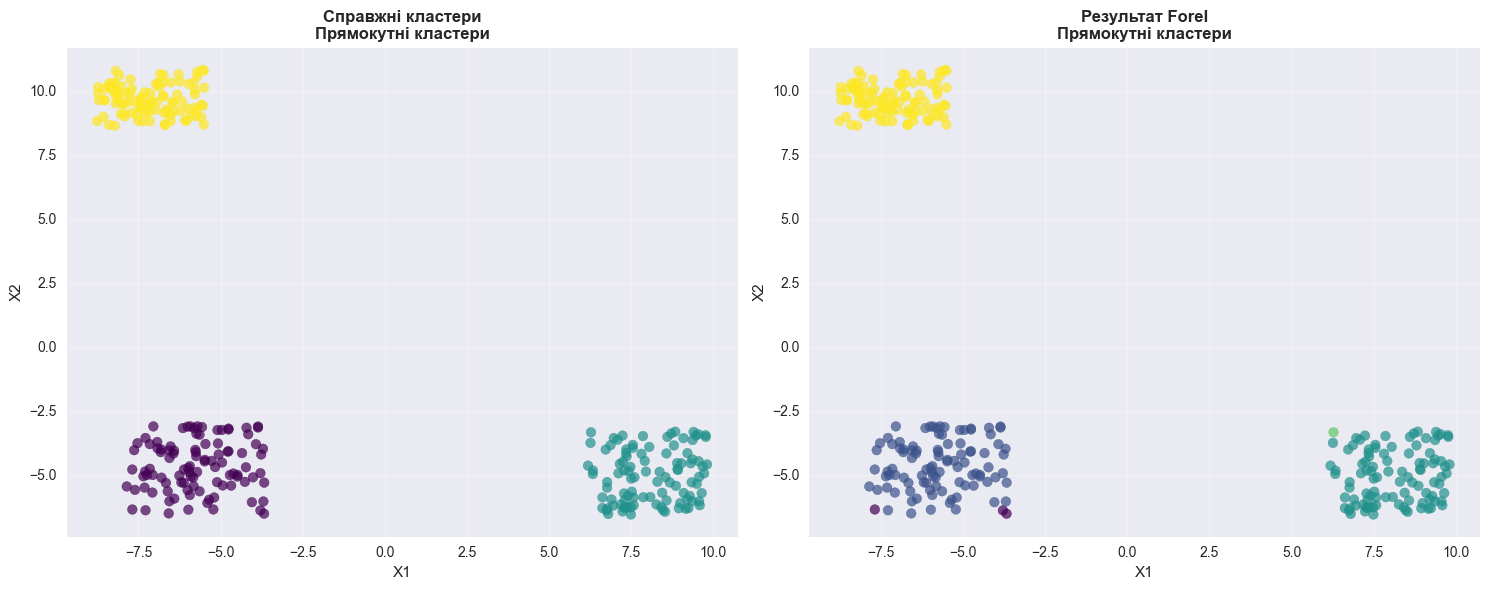

    🔍 Тест стабільності Forel...
💾 Збережено: clustering_visualizations/Forel_Прямокутні_кластери_stability.png


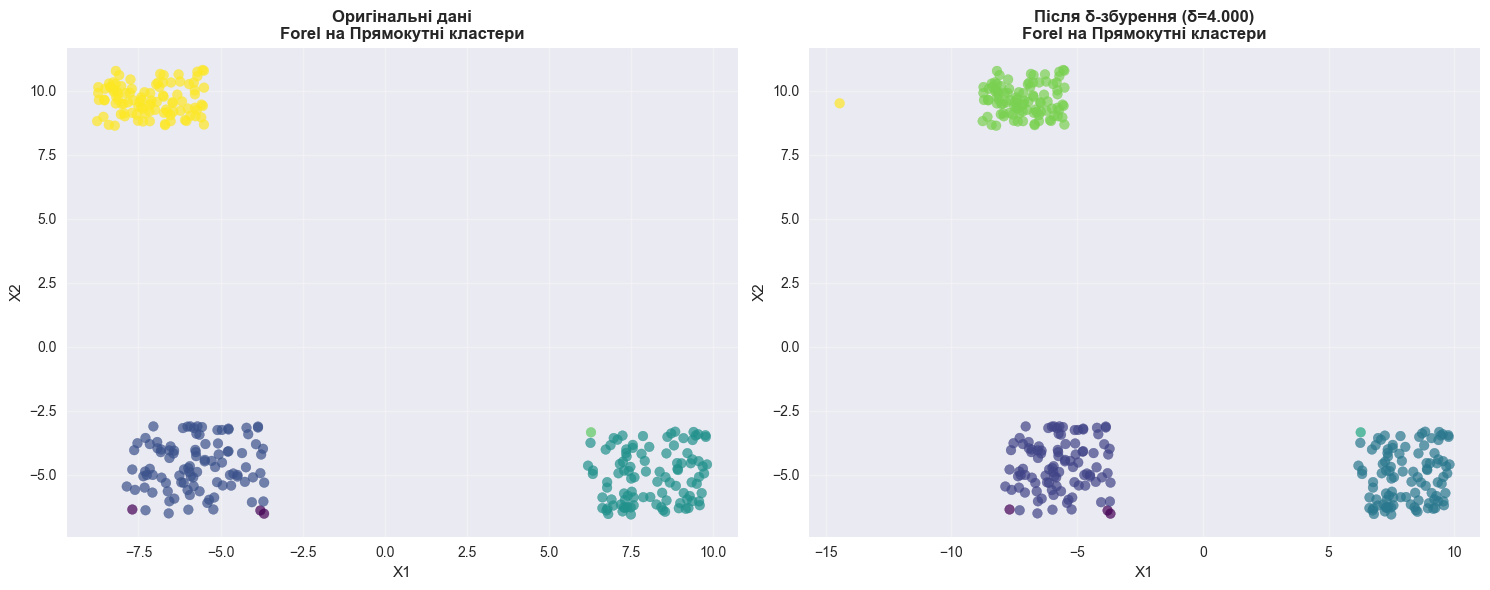


📊 Аналіз набору даних: Літерні форми
----------------------------------------
  🔄 Тестування Forel...
💾 Збережено: clustering_visualizations/Forel_Літерні_форми_results.png


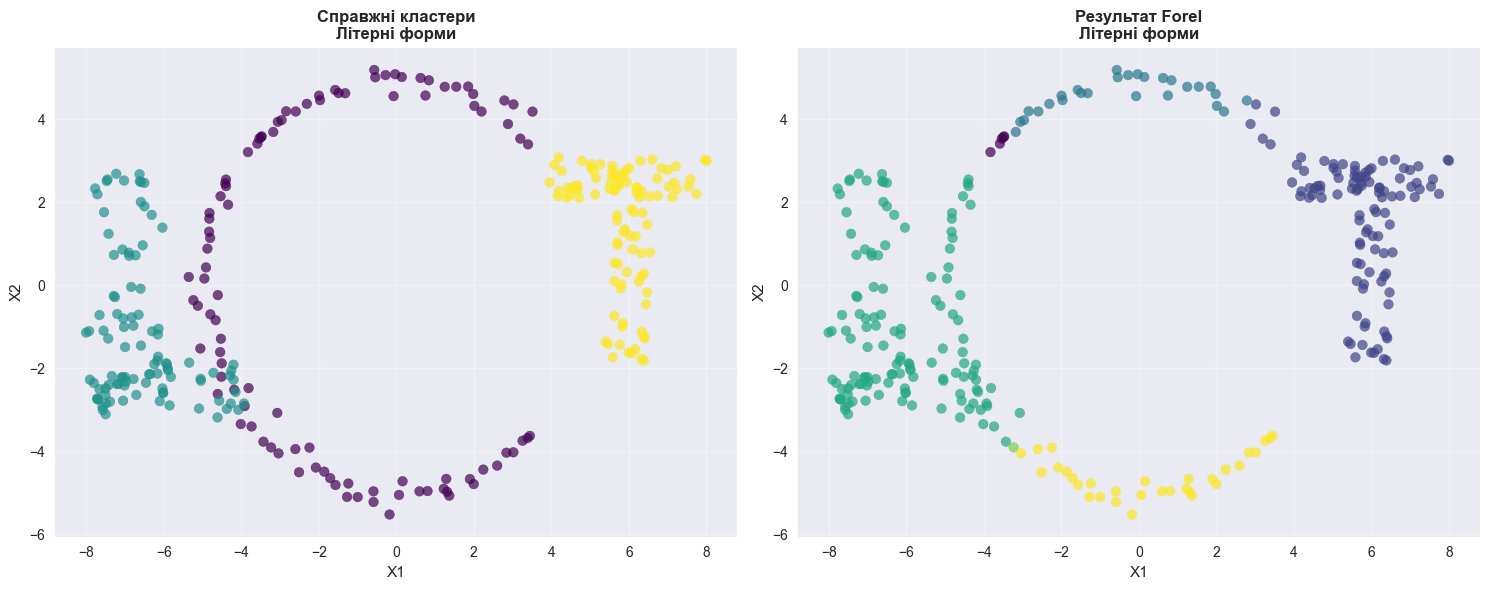

    🔍 Тест стабільності Forel...
💾 Збережено: clustering_visualizations/Forel_Літерні_форми_stability.png


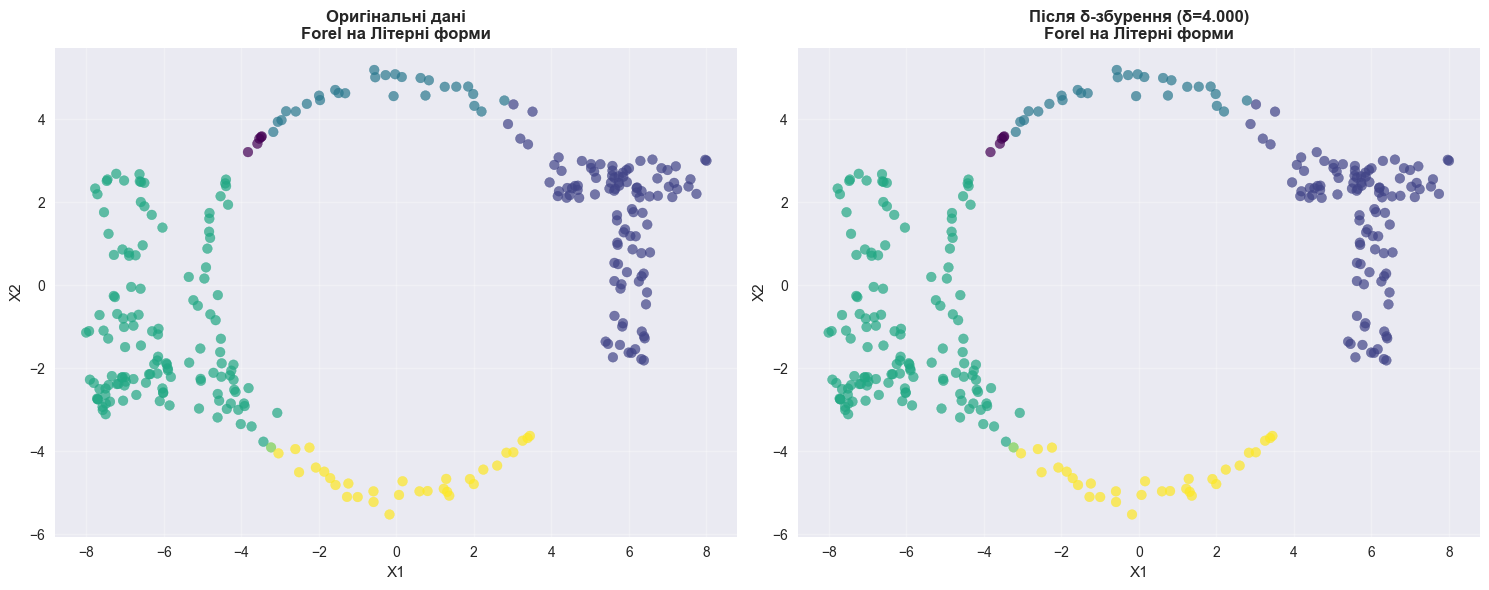


📊 Аналіз набору даних: Змішані типи
----------------------------------------
  🔄 Тестування Forel...
💾 Збережено: clustering_visualizations/Forel_Змішані_типи_results.png


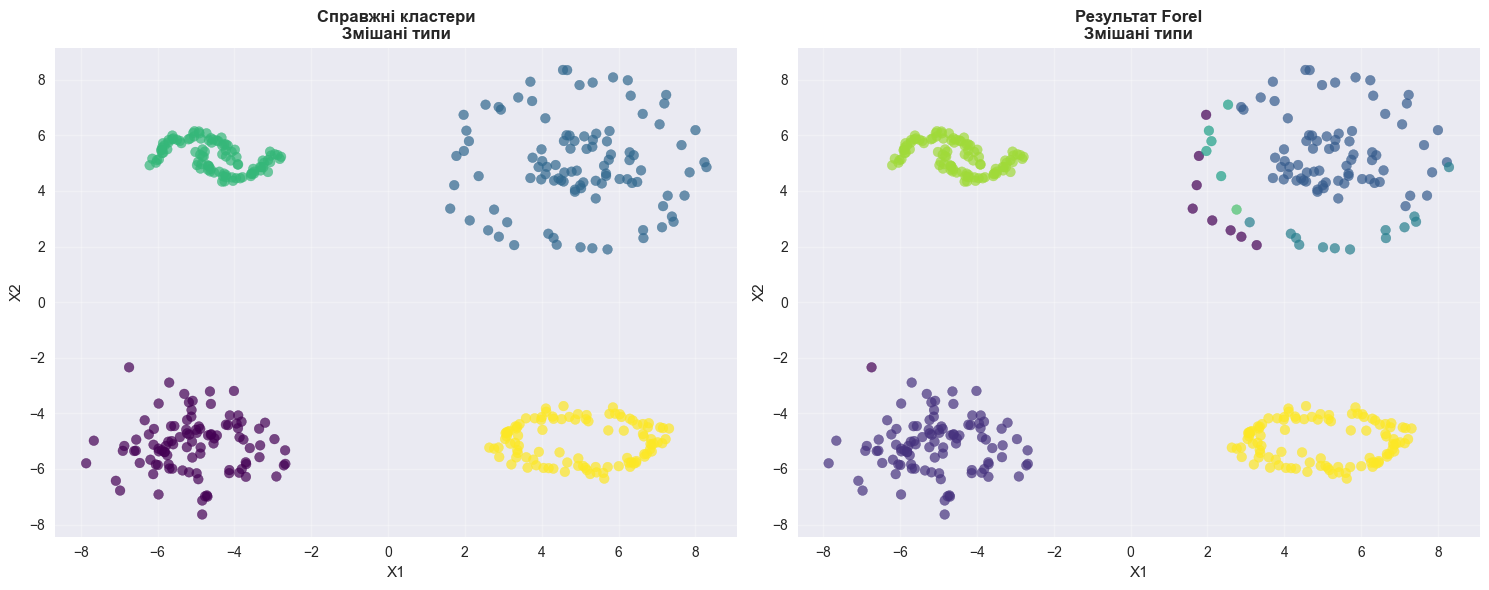

    🔍 Тест стабільності Forel...
💾 Збережено: clustering_visualizations/Forel_Змішані_типи_stability.png


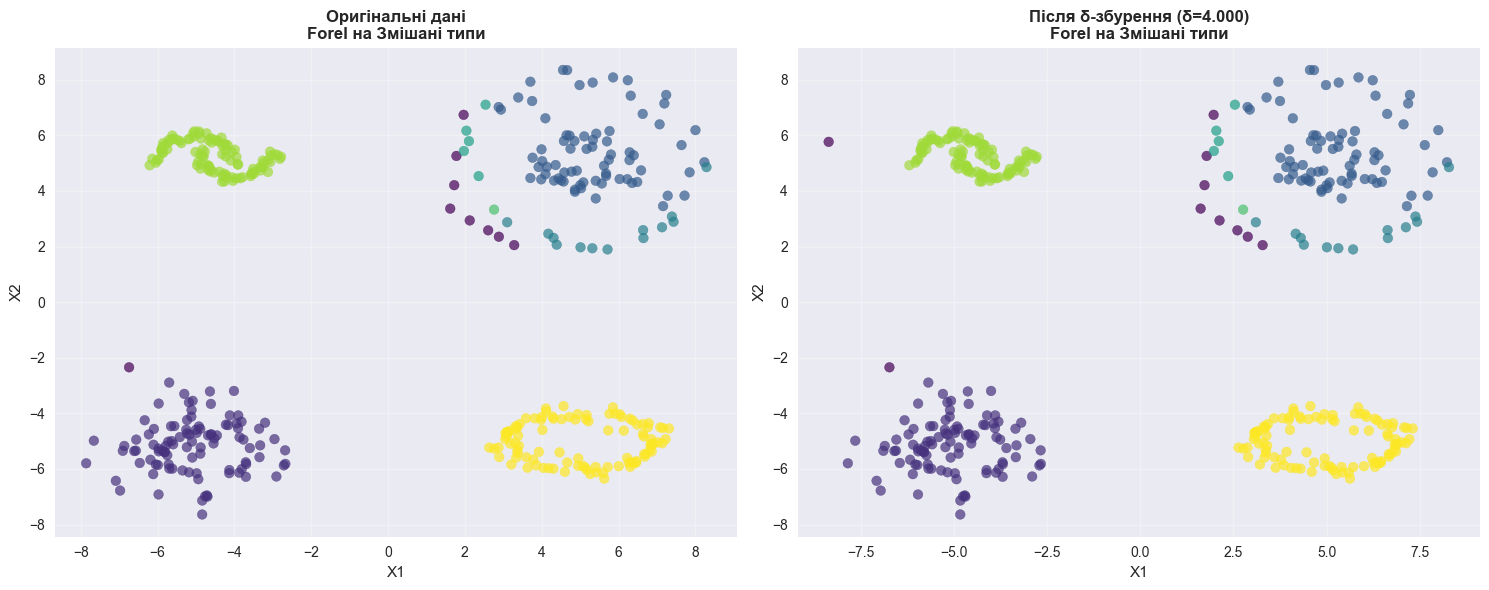

In [21]:
for dataset_name, (X, y_true) in datasets.items():
    print(f"\n📊 Аналіз набору даних: {dataset_name}")
    print("-" * 40)
    
    alg_name = "Forel"
    alg_func = algorithms['Forel']
    print(f"  🔄 Тестування {alg_name}...")
    
    
    param_idx = list(datasets.keys()).index(dataset_name)
    param = algorithm_params[alg_name][param_idx]
    
    
    result, exec_time, memory_used = measure_performance(alg_func, X, param)
    
    if isinstance(result, tuple):
        centers, labels_pred = result
    else:
        centers, labels_pred = None, result
        
    
    performance_results.append({
        'Алгоритм': alg_name,
        'Набір даних': dataset_name,
        'Час виконання (сек)': round(exec_time, 4),
        'Пам\'ять (МБ)': round(memory_used, 2),
        'Параметр': param
    })
        
    
    save_path = f'clustering_visualizations/{alg_name}_{dataset_name.replace(" ", "_")}_results.png'
    plot_clustering_results(X, y_true, labels_pred, alg_name, dataset_name, 
                              centers, save_path)
    
    
    print(f"    🔍 Тест стабільності {alg_name}...")
    delta_values = [0.2, 2, 4.0]
    stability_test_results = stability_test(alg_func, X, delta_values, param)
        
    for j, delta_result in enumerate(stability_test_results):
        stability_results.append({
            'Алгоритм': alg_name,
            'Набір даних': dataset_name,
            'δ': delta_result['delta'],
            'Схожість': round(delta_result['similarity'], 3)
        })
        

    if j == 2:
            save_path = f'clustering_visualizations/{alg_name}_{dataset_name.replace(" ", "_")}_stability.png'
            plot_stability_analysis(X, delta_result['perturbed_data'], 
                                    delta_result['original_labels'], 
                                    delta_result['perturbed_labels'],
                                    alg_name, dataset_name, delta_result['delta'], 
                                    save_path)


📊 Аналіз набору даних: Кругові кластери
----------------------------------------
  🔄 Тестування Mean Shift...
💾 Збережено: clustering_visualizations/Mean Shift_Кругові_кластери_results.png


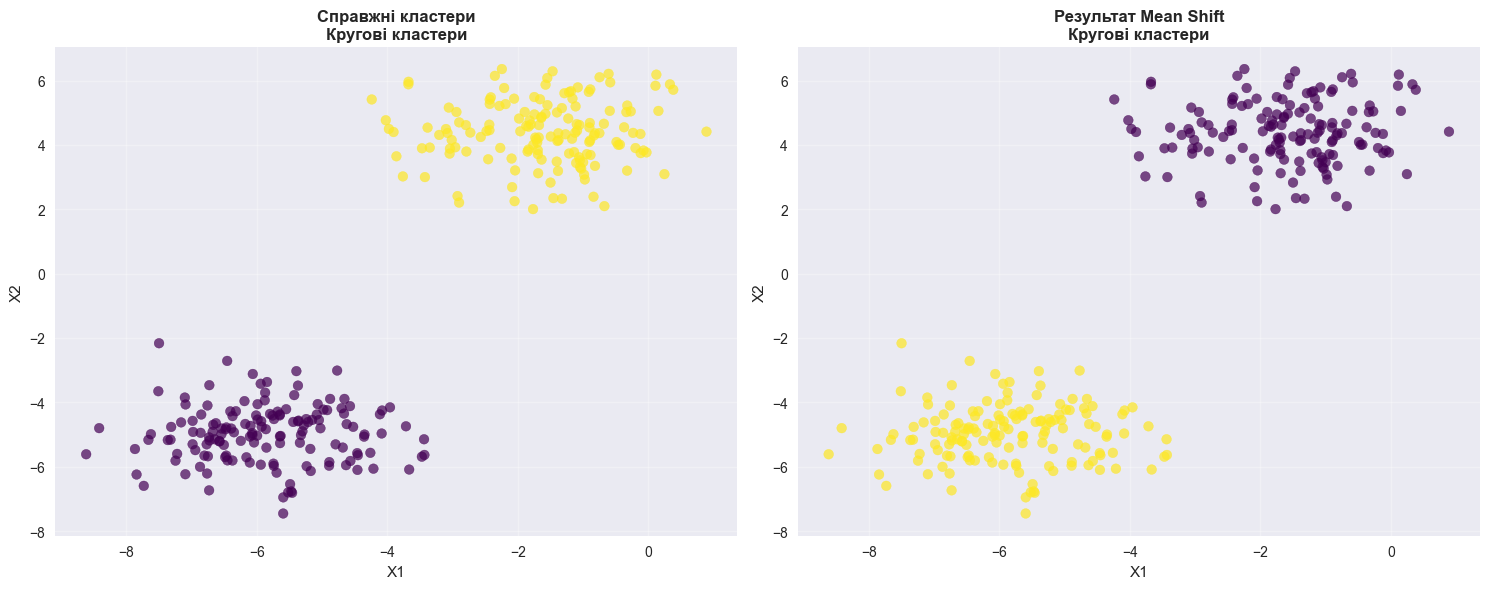

    🔍 Тест стабільності Mean Shift...
💾 Збережено: clustering_visualizations/Mean Shift_Кругові_кластери_stability.png


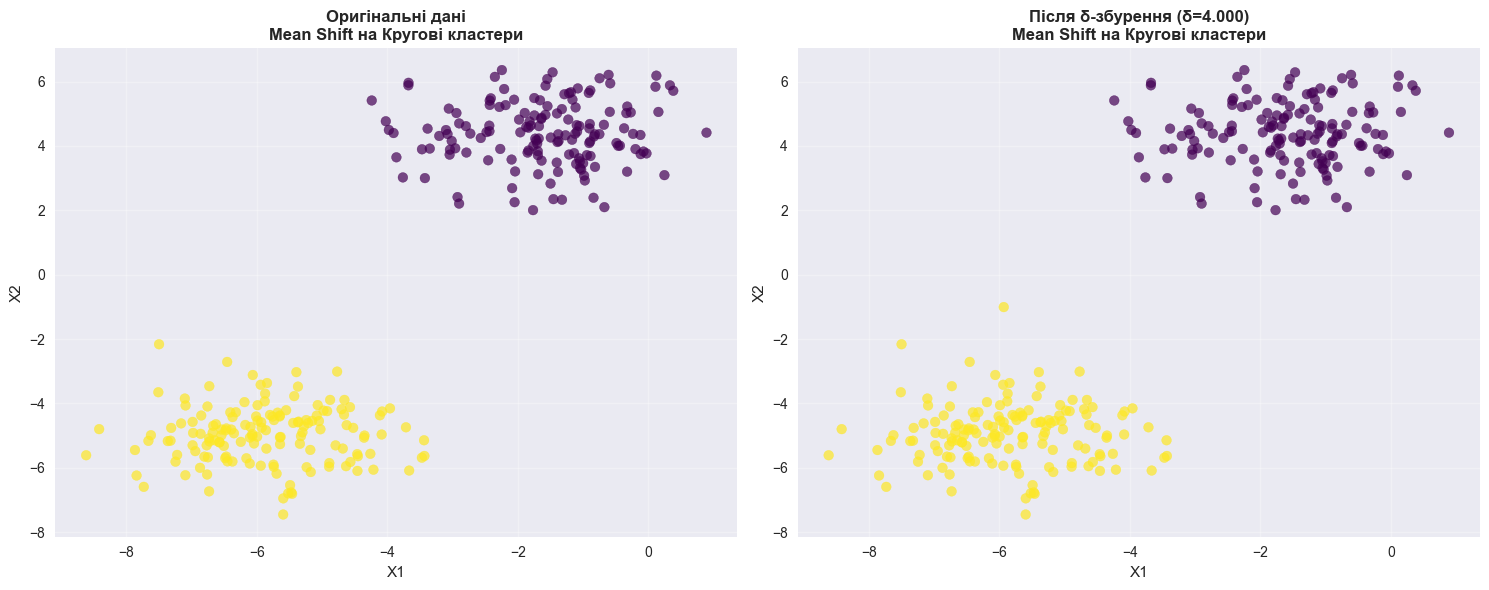


📊 Аналіз набору даних: Еліптичні кластери
----------------------------------------
  🔄 Тестування Mean Shift...
💾 Збережено: clustering_visualizations/Mean Shift_Еліптичні_кластери_results.png


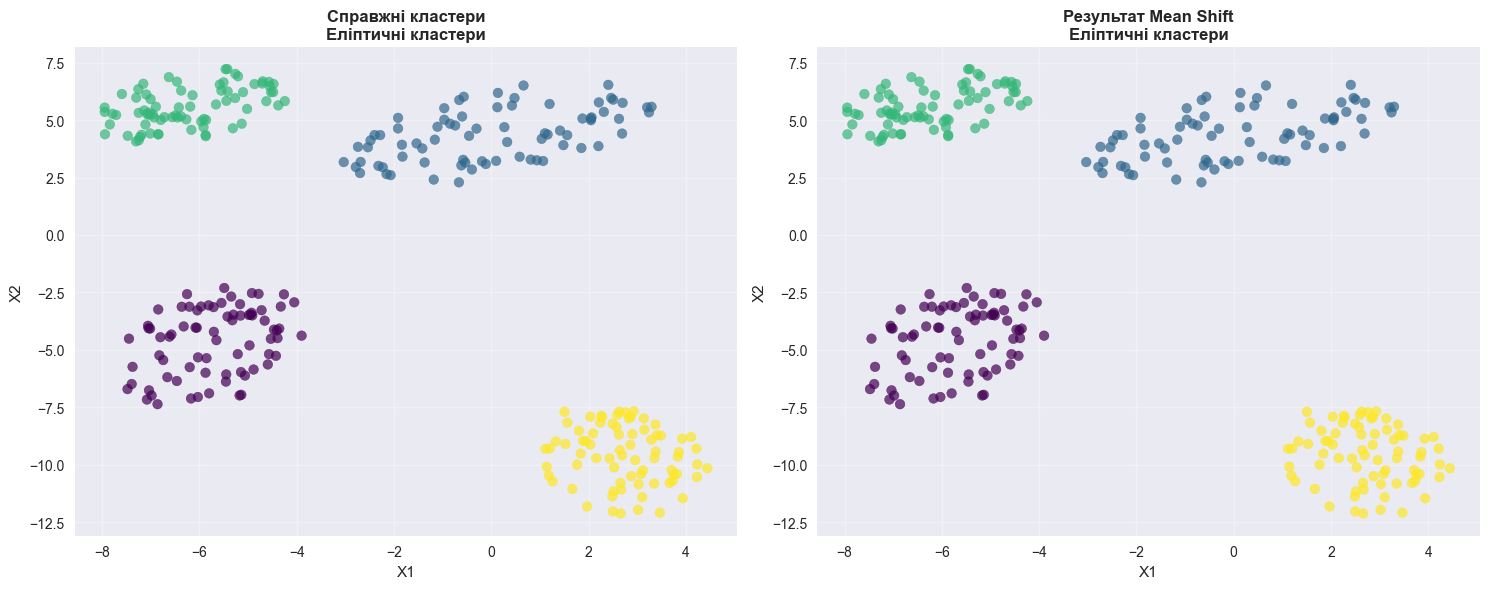

    🔍 Тест стабільності Mean Shift...
💾 Збережено: clustering_visualizations/Mean Shift_Еліптичні_кластери_stability.png


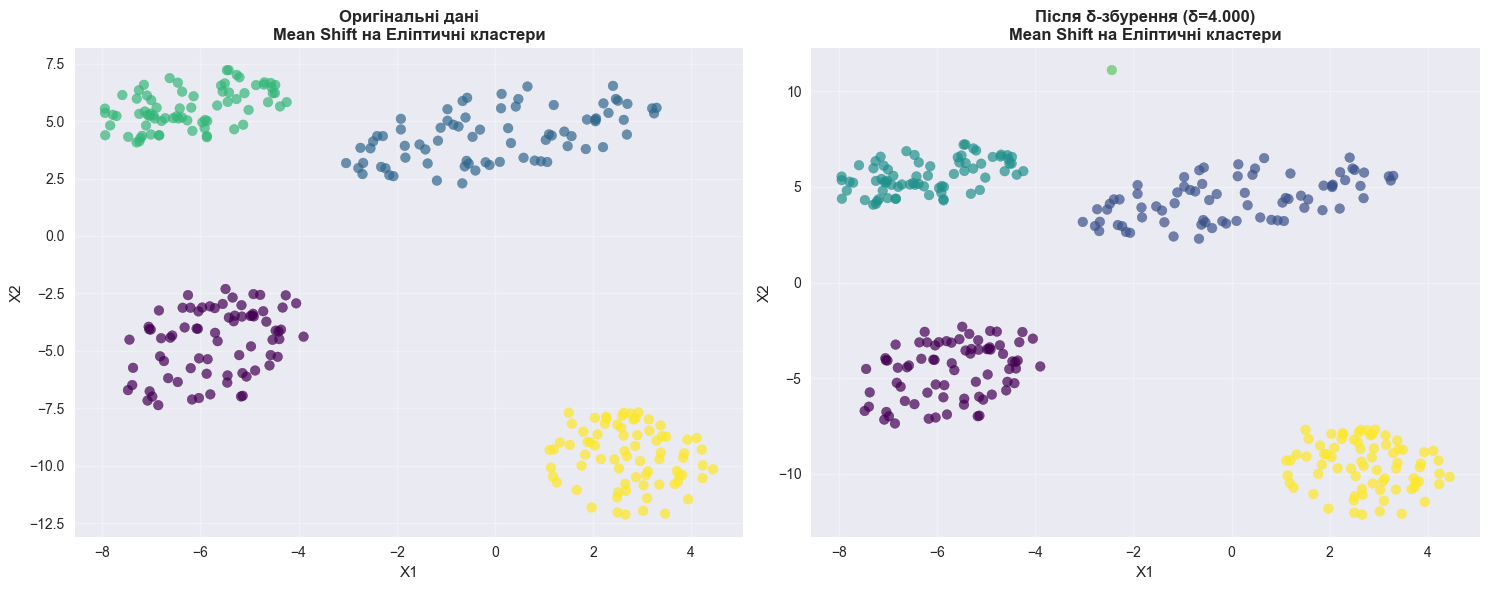


📊 Аналіз набору даних: Прямокутні кластери
----------------------------------------
  🔄 Тестування Mean Shift...
💾 Збережено: clustering_visualizations/Mean Shift_Прямокутні_кластери_results.png


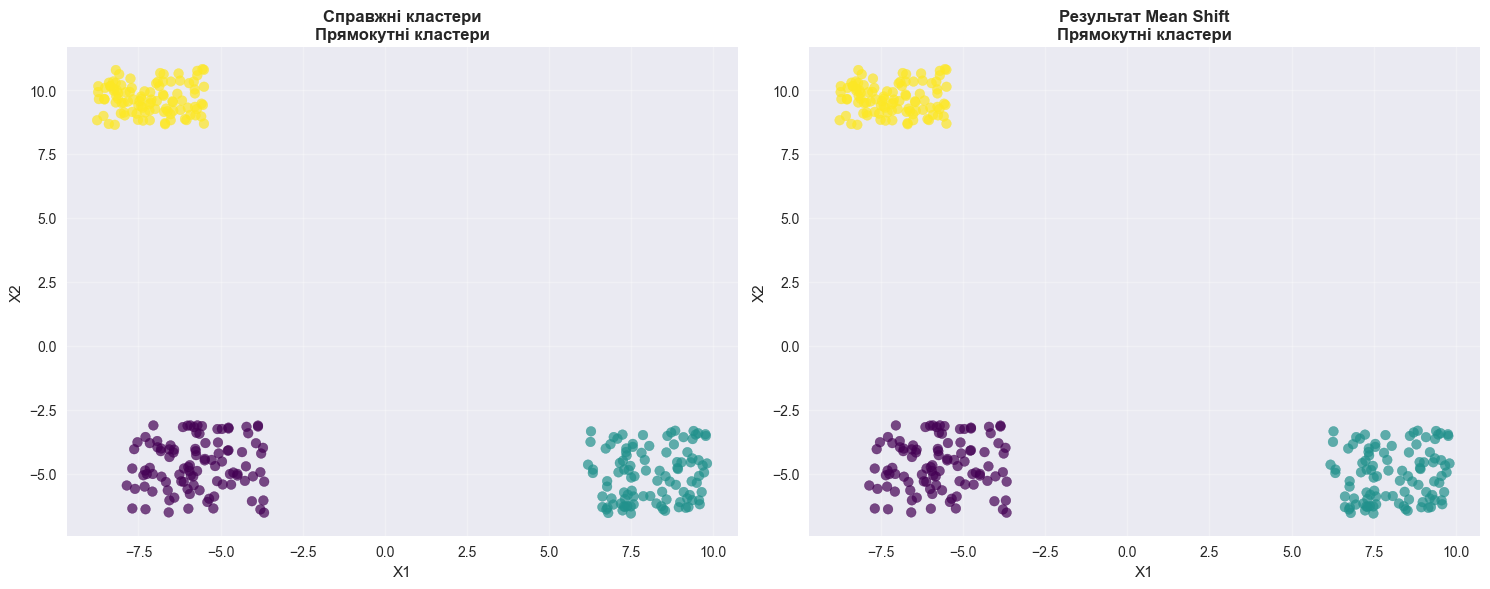

    🔍 Тест стабільності Mean Shift...
💾 Збережено: clustering_visualizations/Mean Shift_Прямокутні_кластери_stability.png


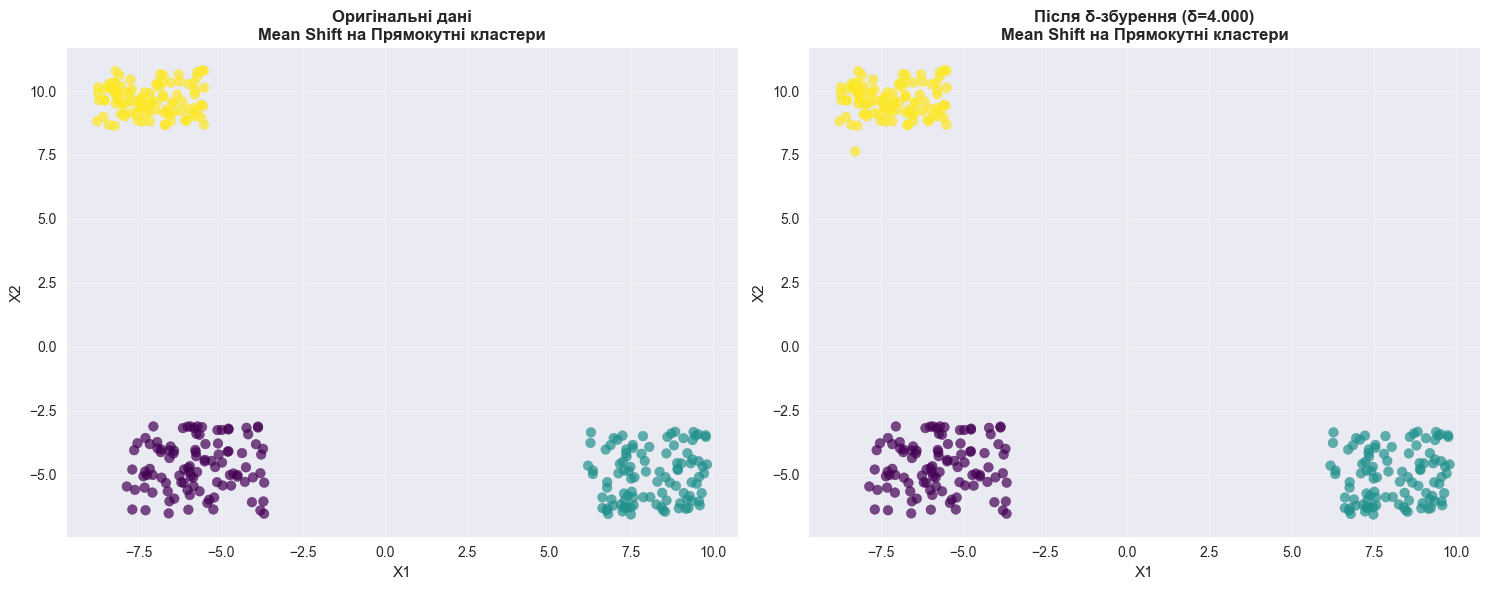


📊 Аналіз набору даних: Літерні форми
----------------------------------------
  🔄 Тестування Mean Shift...
💾 Збережено: clustering_visualizations/Mean Shift_Літерні_форми_results.png


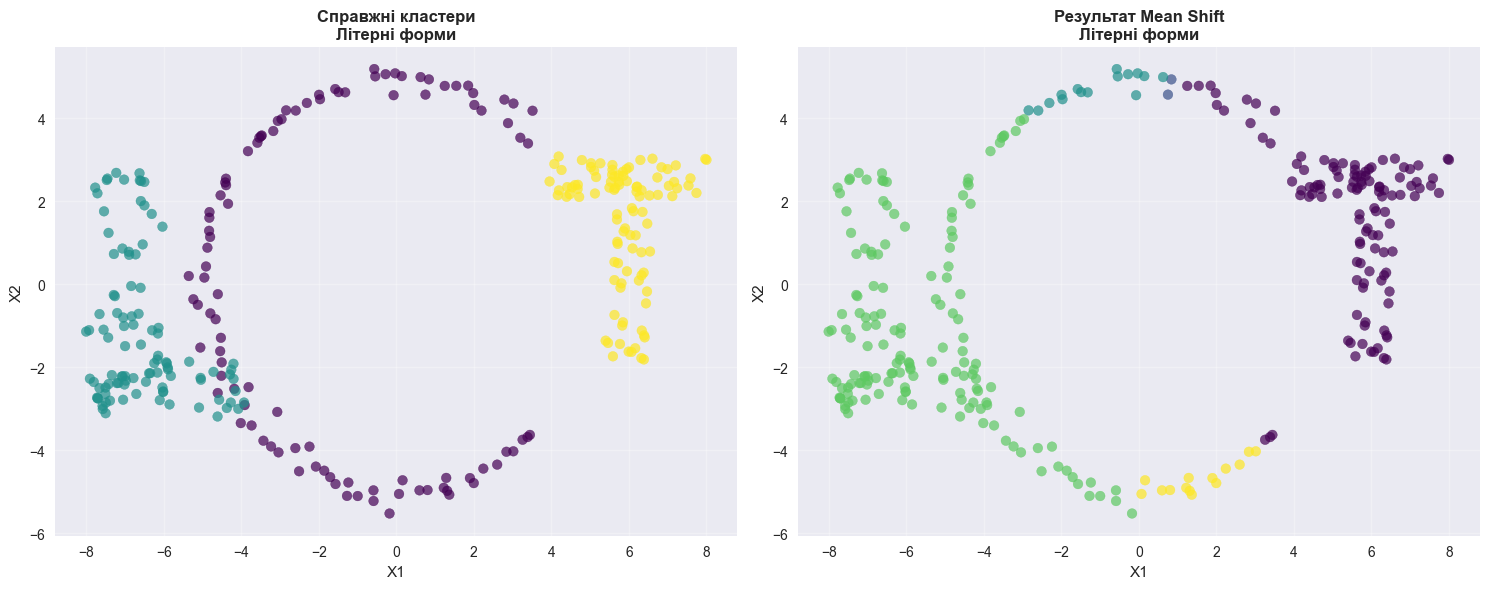

    🔍 Тест стабільності Mean Shift...
💾 Збережено: clustering_visualizations/Mean Shift_Літерні_форми_stability.png


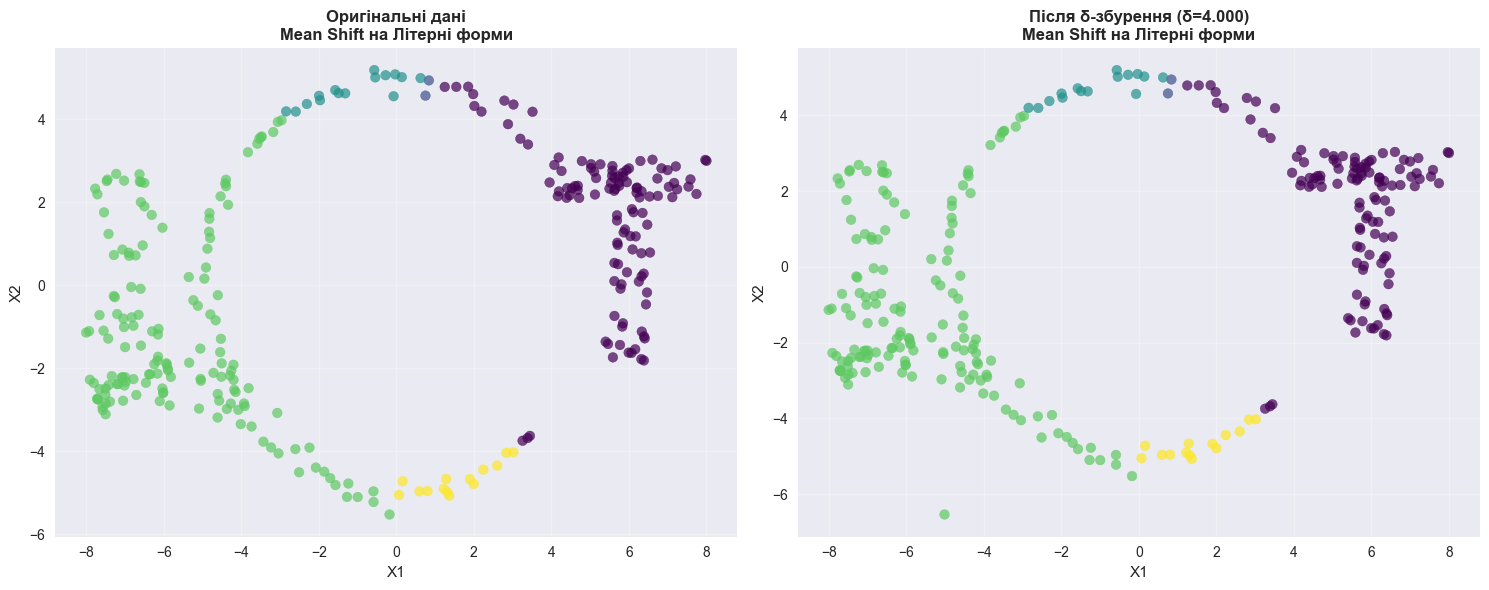


📊 Аналіз набору даних: Змішані типи
----------------------------------------
  🔄 Тестування Mean Shift...
💾 Збережено: clustering_visualizations/Mean Shift_Змішані_типи_results.png


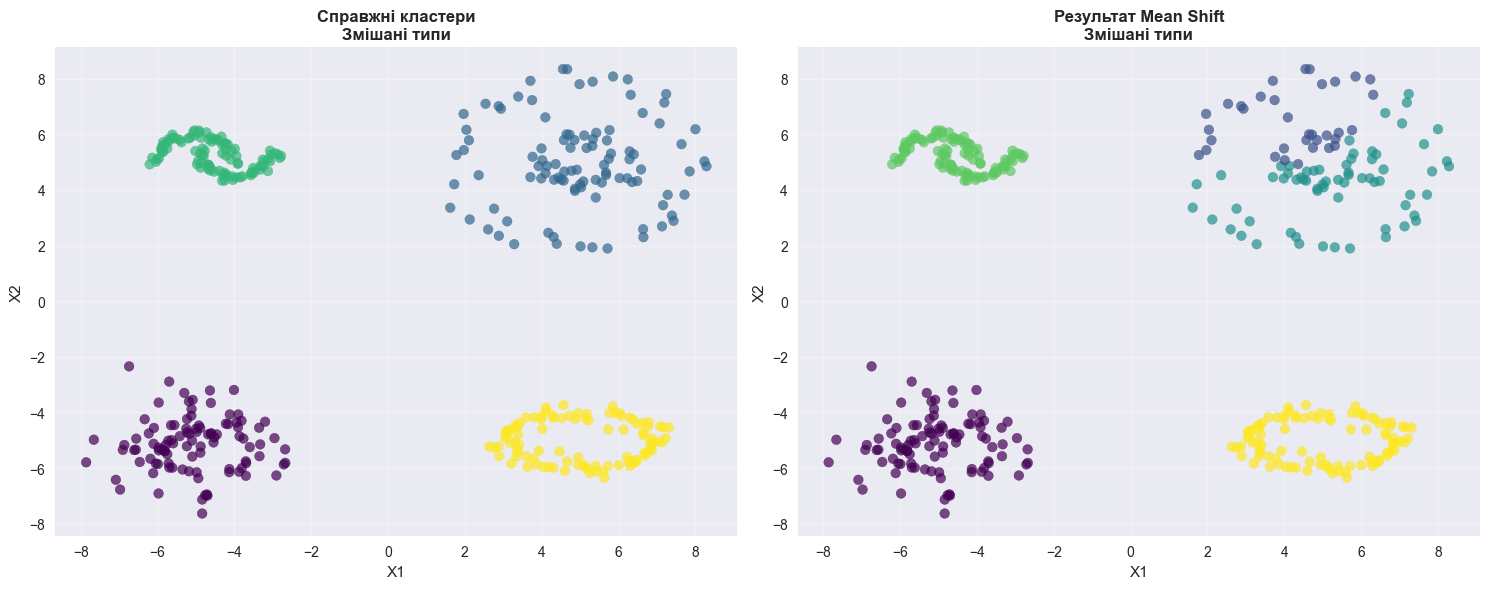

    🔍 Тест стабільності Mean Shift...
💾 Збережено: clustering_visualizations/Mean Shift_Змішані_типи_stability.png


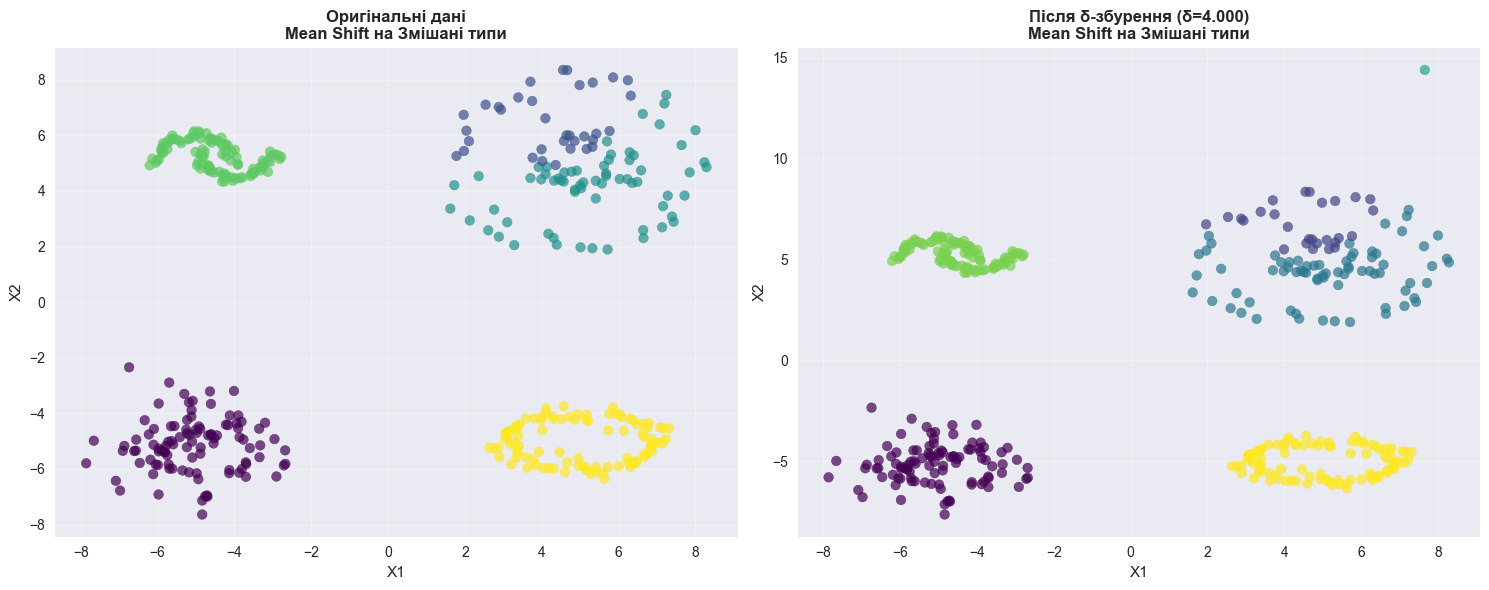

In [22]:
for dataset_name, (X, y_true) in datasets.items():
    print(f"\n📊 Аналіз набору даних: {dataset_name}")
    print("-" * 40)
    
    alg_name = "Mean Shift"
    alg_func = algorithms['Mean Shift']
    print(f"  🔄 Тестування {alg_name}...")
    
    
    param_idx = list(datasets.keys()).index(dataset_name)
    param = algorithm_params[alg_name][param_idx]
    
    
    result, exec_time, memory_used = measure_performance(alg_func, X, param)
    
    if isinstance(result, tuple):
        centers, labels_pred = result
    else:
        centers, labels_pred = None, result
        
    
    performance_results.append({
        'Алгоритм': alg_name,
        'Набір даних': dataset_name,
        'Час виконання (сек)': round(exec_time, 4),
        'Пам\'ять (МБ)': round(memory_used, 2),
        'Параметр': param
    })
        
    
    save_path = f'clustering_visualizations/{alg_name}_{dataset_name.replace(" ", "_")}_results.png'
    plot_clustering_results(X, y_true, labels_pred, alg_name, dataset_name, 
                              centers, save_path)
    
    
    print(f"    🔍 Тест стабільності {alg_name}...")
    delta_values = [0.2, 2, 4.0]
    stability_test_results = stability_test(alg_func, X, delta_values, param)
        
    for j, delta_result in enumerate(stability_test_results):
        stability_results.append({
            'Алгоритм': alg_name,
            'Набір даних': dataset_name,
            'δ': delta_result['delta'],
            'Схожість': round(delta_result['similarity'], 3)
        })
        

    if j == 2:
            save_path = f'clustering_visualizations/{alg_name}_{dataset_name.replace(" ", "_")}_stability.png'
            plot_stability_analysis(X, delta_result['perturbed_data'], 
                                    delta_result['original_labels'], 
                                    delta_result['perturbed_labels'],
                                    alg_name, dataset_name, delta_result['delta'], 
                                    save_path)

In [23]:
def create_summary_plots(performance_df, stability_df):
    """Створення зводних графіків"""
    
    # График порівняння часу виконання
    plt.figure(figsize=(12, 8))
    pivot_time = performance_df.pivot(index='Набір даних', columns='Алгоритм', values='Час виконання (сек)')
    pivot_time.plot(kind='bar', width=0.8)
    plt.title('Порівняння часу виконання алгоритмів', fontsize=14, fontweight='bold')
    plt.xlabel('Набір даних')
    plt.ylabel('Час виконання (секунди)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Алгоритм')
    plt.tight_layout()
    plt.savefig('clustering_visualizations/execution_time_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # График порівняння використання пам'яті
    plt.figure(figsize=(12, 8))
    pivot_memory = performance_df.pivot(index='Набір даних', columns='Алгоритм', values='Пам\'ять (МБ)')
    pivot_memory.plot(kind='bar', width=0.8)
    plt.title('Порівняння використання пам\'яті', fontsize=14, fontweight='bold')
    plt.xlabel('Набір даних')
    plt.ylabel('Використання пам\'яті (МБ)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Алгоритм')
    plt.tight_layout()
    plt.savefig('clustering_visualizations/memory_usage_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # График стабільності
    plt.figure(figsize=(14, 10))
    for i, algorithm in enumerate(stability_df['Алгоритм'].unique()):
        plt.subplot(2, 2, i+1)
        alg_data = stability_df[stability_df['Алгоритм'] == algorithm]
        pivot_stability = alg_data.pivot(index='Набір даних', columns='δ', values='Схожість')
        pivot_stability.plot(kind='bar', width=0.8, ax=plt.gca())
        plt.title(f'Стабільність: {algorithm}', fontweight='bold')
        plt.xlabel('Набір даних')
        plt.ylabel('Схожість результатів')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='δ')
    
    plt.tight_layout()
    plt.savefig('clustering_visualizations/stability_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()